# Funcworks: Functional Workflows for Neuroimaging Data Modeling
**Presenter: Adam Kimbler**<br/>
**Date: April 21, 2020**

# BIDS Model

**Funcworks** is a tool to process BIDS Format data that has already been preprocessed using a tool like **fMRIPrep** using the newly defined **BIDS-Model** standard

In [14]:
!tree /mnt/d/Documents/EMUR01_test/dset/ -n -I "sub-4000"

/mnt/d/Documents/EMUR01_test/dset/
├── dataset_description.json
├── models
│   └── model-default_smdl.json
└── sub-4001
    ├── ses-S1
    │   ├── anat
    │   │   ├── sub-4001_ses-S1_PD.json
    │   │   ├── sub-4001_ses-S1_PD.nii.gz
    │   │   ├── sub-4001_ses-S1_run-1_T1w.json
    │   │   ├── sub-4001_ses-S1_run-1_T1w.nii.gz
    │   │   ├── sub-4001_ses-S1_run-2_T1w.json
    │   │   ├── sub-4001_ses-S1_run-2_T1w.nii.gz
    │   │   ├── sub-4001_ses-S1_run-3_T1w.json
    │   │   ├── sub-4001_ses-S1_run-3_T1w.nii.gz
    │   │   ├── sub-4001_ses-S1_run-4_T1w.json
    │   │   └── sub-4001_ses-S1_run-4_T1w.nii.gz
    │   ├── fmap
    │   │   ├── sub-4001_ses-S1_acq-func_dir-AP_run-1_epi.json
    │   │   ├── sub-4001_ses-S1_acq-func_dir-AP_run-1_epi.nii.gz
    │   │   ├── sub-4001_ses-S1_acq-func_dir-AP_run-3_epi.json
    │   │   ├── sub-4001_ses-S1_acq-func_dir-AP_run-3_epi.nii.gz
    │   │   ├── sub-4001_ses-S1_acq-func_dir-AP_run-5_epi.json
    │   │   ├── sub-4001_ses-S1_acq-func_dir-A

In [44]:
!tree /mnt/d/Documents/EMUR01_test/derivatives/fmriprep/ -L 4 -n -I "figures|log|sub-4000"

/mnt/d/Documents/EMUR01_test/derivatives/fmriprep/
├── dataset_description.json
└── sub-4001
    ├── anat
    │   ├── sub-4001_desc-aparcaseg_dseg.nii.gz
    │   ├── sub-4001_desc-aseg_dseg.nii.gz
    │   ├── sub-4001_desc-brain_mask.json
    │   ├── sub-4001_desc-brain_mask.nii.gz
    │   ├── sub-4001_desc-preproc_T1w.json
    │   ├── sub-4001_desc-preproc_T1w.nii.gz
    │   ├── sub-4001_dseg.nii.gz
    │   ├── sub-4001_from-T1w_to-fsnative_mode-image_xfm.txt
    │   ├── sub-4001_hemi-L_inflated.surf.gii
    │   ├── sub-4001_hemi-L_midthickness.surf.gii
    │   ├── sub-4001_hemi-L_pial.surf.gii
    │   ├── sub-4001_hemi-L_smoothwm.surf.gii
    │   ├── sub-4001_hemi-R_inflated.surf.gii
    │   ├── sub-4001_hemi-R_midthickness.surf.gii
    │   ├── sub-4001_hemi-R_pial.surf.gii
    │   ├── sub-4001_hemi-R_smoothwm.surf.gii
    │   ├── sub-4001_label-CSF_probseg.nii.gz
    │   ├── sub-4001_label-GM_probseg.nii.gz
    │   └── sub-4001_label-WM_probseg.nii.gz
    ├── ses-S1
    │   ├── anat

In [45]:
cat ../models/emuR01/model-default_smdl.json

{
  "Name": "model-initial",
  "Description": "Initial Model for emuR01",
  "Input": {
    "Include": {
      "task":"test"
    },
  "Steps": [
    {
      "Level": "run",
      "Transformations": [],
      "Model": {
        "X": [
          "trial_type.neg_lure_fa", "trial_type.neu_lure_fa", "trial_type.pos_lure_fa",
          "trial_type.neg_lure_cr", "trial_type.neu_lure_cr", "trial_type.pos_lure_cr",
          "trial_type.neg_foil_fa", "trial_type.neu_foil_fa", "trial_type.pos_foil_fa",
          "trial_type.neg_foil_cr", "trial_type.neu_foil_cr", "trial_type.pos_foil_cr",
          "trial_type.neg_targ_ht", "trial_type.neu_targ_ht", "trial_type.pos_targ_ht",
          "trial_type.neg_targ_ms", "trial_type.neu_targ_ms", "trial_type.pos_targ_ms",
          "trial_type.non_resp_tr",
          "trans_x", "trans_y", "trans_z", "rot_x", "rot_y", "rot_z",
          "trans_x_derivative1", "trans_y_derivative1", "trans_z_derivative1",
          "rot_x_derivative1", "rot_y_derivative1", "r

# Running Funcworks

As a BIDS App, `funcworks` has 3 main arguments `dataset`, `output` and `level`. Each possible value for level corresponds to a level of analysis present in your BIDS-Model file. If you only want to execute the analysis at the `run` level, for instance, you would enter a command such as:
<br/>`funcworks dset/ output/ run`

Funcworks also has two more required argument:
* `--derivatives (or -d)` that points to a directory containing `fmriprep` derivatives to use in the modeling.
* `--model-file (or -m)` that points to a model file for the particular dataset you want to analyze. <br/>

Making the shortest command you can run:<br/>
`funcworks dset/ output/ run -d derivatives/fmriprep -m model-example_smdl.json`

In [1]:
!funcworks --help

usage: funcworks [-h] [-m MODEL_FILE] [-d DERIVATIVES [DERIVATIVES ...]]
                 [--participant_label PARTICIPANT_LABEL [PARTICIPANT_LABEL ...]]
                 [-s FWHM[:LEVEL:[TYPE]]] [-w WORK_DIR] [--use-rapidart]
                 [--use-plugin USE_PLUGIN] [--detrend-poly DETREND_POLY]
                 [--align-volumes ALIGN_VOLUMES]
                 [--database-path DATABASE_PATH] [-sa] [--version]
                 bids_dir output_dir {run,session,participant,dataset}

FUNCWORKs: fMRI FUNCtional WORKflows

positional arguments:
  bids_dir              Root folder of BIDS Dataset being analyzed(sub-XXXXX
                        folders should be found at the top level in this
                        folder).
  output_dir            Output path for the processed data and visual reports
  {run,session,participant,dataset}
                        Processing stage to be run (see BIDS-Apps
                        specification).

optional arguments:
  -h, --help            show

In [48]:
!funcworks /mnt/d/Documents/EMUR01_test/dset/ /mnt/d/Documents/EMUR01_test/derivatives/ session \
    --model-file /mnt/d/Documents/EMUR01_test/dset/models/model-default_smdl.json \
    --derivatives /mnt/d/Documents/EMUR01_test/derivatives/fmriprep/ \
    --work-dir /mnt/d/Documents/work/ \
    --use-rapidart \
    --smoothing 4 \
    --detrend-poly 3 \
    --align-volumes 2 \
    --participant-label 4001 \
    --smooth-autocorrelations

200421-10:58:04,226 nipype.workflow IMPORTANT:
	 
        Running FUNCWORKS version v0.0.1a5+105.g08ddb9a.dirty:
          * BIDS dataset path: /mnt/d/Documents/EMUR01_test/dset.
          * Participant list: ['4001'].
          * Run identifier: 20200421-105804_0e7aeea1-ec41-4005-9da1-c23de547939f.
        
200421-10:58:04,977 nipype.utils INFO:
	 No new version available.
200421-10:58:11,226 nipype.workflow INFO:
	 Workflow funcworks_wf settings: ['check', 'execution', 'logging', 'monitoring']
200421-10:58:11,399 nipype.workflow INFO:
	 Running in parallel.
200421-10:58:11,405 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-10:58:12,502 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.func_select" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/func_select".
200421-10:58:12,523 nipype.workflow INFO:
	 [Node] Run

200421-11:08:36,590 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 6 jobs ready. Free memory (GB): 27.97/28.77, Free processors: 0/4.
                     Currently running:
                       * _func_realign5
                       * _func_realign4
                       * _func_realign2
                       * _func_realign0
200421-11:11:57,901 nipype.workflow INFO:
	 [Node] Finished "_func_realign2".
200421-11:11:58,885 nipype.workflow INFO:
	 [Node] Finished "_func_realign0".
200421-11:11:59,710 nipype.workflow INFO:
	 [Job 26] Completed (_func_realign0).
200421-11:11:59,710 nipype.workflow INFO:
	 [Job 28] Completed (_func_realign2).
200421-11:11:59,712 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 6 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _func_realign5
                       * _func_realign4
200421-11:11:59,759 nipype.workflow INFO:
	 [Node] Setting-up "_get_run_in

200421-11:20:40,227 nipype.workflow INFO:
	 [Node] Finished "_func_realign4".
200421-11:20:41,854 nipype.workflow INFO:
	 [Job 30] Completed (_func_realign4).
200421-11:20:41,855 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:20:41,904 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.func_realign" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/func_realign".
200421-11:20:41,958 nipype.workflow INFO:
	 [Node] Setting-up "_func_realign0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/func_realign/mapflow/_func_realign0".
200421-11:20:41,962 nipype.workflow INFO:
	 [Node] Cached "_func_realign0" - collecting precomputed outputs
200421-11:20:41,962 nipype.workflow INFO:
	 [Node] "_func_realign0" found cached.
200421-11:20:41,964 nipype.workflow INFO:
	 [Node] Setting-

200421-11:21:05,561 nipype.workflow INFO:
	 [Node] Finished "_smooth_susan_medimg2".
200421-11:21:05,638 nipype.workflow INFO:
	 [Node] Finished "_smooth_susan_medimg0".
200421-11:21:05,950 nipype.workflow INFO:
	 [Job 38] Completed (_smooth_susan_medimg0).
200421-11:21:05,951 nipype.workflow INFO:
	 [Job 40] Completed (_smooth_susan_medimg2).
200421-11:21:05,952 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 12 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _smooth_susan_medimg5
                       * _smooth_susan_medimg4
200421-11:21:05,994 nipype.workflow INFO:
	 [Node] Setting-up "_smooth_susan_avgimg0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/smooth_susan_avgimg/mapflow/_smooth_susan_avgimg0".
200421-11:21:05,996 nipype.workflow INFO:
	 [Node] Setting-up "_smooth_susan_avgimg1" in "/mnt/d/Documents/work/model-initial/funcworks_wf/singl

200421-11:21:23,985 nipype.workflow INFO:
	 [Job 2] Completed (funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.smooth_susan_medimg).
200421-11:21:23,987 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 7 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _smooth_susan_avgimg4
                       * _smooth_susan_avgimg3
                       * _smooth_susan_avgimg2
200421-11:21:24,37 nipype.workflow INFO:
	 [Node] Setting-up "_smooth_susan_avgimg5" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/smooth_susan_avgimg/mapflow/_smooth_susan_avgimg5".
200421-11:21:24,63 nipype.workflow INFO:
	 [Node] Running "_smooth_susan_avgimg5" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/func_realign/mapflow/_func_realign5/sub-4001_

200421-11:21:36,125 nipype.workflow INFO:
	 [Node] Running "smooth_merge" ("nipype.interfaces.utility.base.Merge")
200421-11:21:36,140 nipype.workflow INFO:
	 [Node] Finished "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.smooth_merge".
200421-11:21:38,44 nipype.workflow INFO:
	 [Job 4] Completed (funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.smooth_merge).
200421-11:21:38,46 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 4 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _rapidart_run2
                       * _rapidart_run1
                       * _rapidart_run0
200421-11:21:38,122 nipype.workflow INFO:
	 [Node] Setting-up "_rapidart_run3" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/rapidart_run/mapflow/_rapidart_run3".
200421-11:21:38,148 nipype.workflow INFO:
	 [Node] Running "_rapidart_run3" ("nipype.algorithms.rapidart.Artifact

200421-11:23:10,678 nipype.workflow INFO:
	 [Node] Cached "_rapidart_run1" - collecting precomputed outputs
200421-11:23:10,678 nipype.workflow INFO:
	 [Node] "_rapidart_run1" found cached.
200421-11:23:10,680 nipype.workflow INFO:
	 [Node] Setting-up "_rapidart_run2" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/rapidart_run/mapflow/_rapidart_run2".
200421-11:23:10,683 nipype.workflow INFO:
	 [Node] Cached "_rapidart_run2" - collecting precomputed outputs
200421-11:23:10,683 nipype.workflow INFO:
	 [Node] "_rapidart_run2" found cached.
200421-11:23:10,685 nipype.workflow INFO:
	 [Node] Setting-up "_rapidart_run3" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/rapidart_run/mapflow/_rapidart_run3".
200421-11:23:10,688 nipype.workflow INFO:
	 [Node] Cached "_rapidart_run3" - collecting precomputed outputs
200421-11:23:10,688 nipype.workflow INFO:
	 [Node] "_rapidart_run3" found cached.
200421-11:

200421-11:25:23,251 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 5 jobs ready. Free memory (GB): 27.97/28.77, Free processors: 0/4.
                     Currently running:
                       * _reshape_rapidart0
                       * _smooth_susan5
                       * _smooth_susan4
                       * _smooth_susan2
200421-11:25:30,559 nipype.workflow INFO:
	 [Node] Finished "_reshape_rapidart0".
200421-11:25:31,290 nipype.workflow INFO:
	 [Job 62] Completed (_reshape_rapidart0).
200421-11:25:31,291 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 5 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _smooth_susan5
                       * _smooth_susan4
                       * _smooth_susan2
200421-11:25:31,349 nipype.workflow INFO:
	 [Node] Setting-up "_reshape_rapidart1" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/resha

200421-11:26:06,652 nipype.workflow INFO:
	 [Node] Cached "_reshape_rapidart4" - collecting precomputed outputs
200421-11:26:06,652 nipype.workflow INFO:
	 [Node] "_reshape_rapidart4" found cached.
200421-11:26:06,654 nipype.workflow INFO:
	 [Node] Setting-up "_reshape_rapidart5" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/reshape_rapidart/mapflow/_reshape_rapidart5".
200421-11:26:06,707 nipype.workflow INFO:
	 [Node] Cached "_reshape_rapidart5" - collecting precomputed outputs
200421-11:26:06,708 nipype.workflow INFO:
	 [Node] "_reshape_rapidart5" found cached.
200421-11:26:07,386 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 0 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.reshape_rapidart
                       * _smooth_susan5
                       * _smooth_susan4
200421-11:26:07,605 nip

200421-11:27:29,433 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 2 jobs ready. Free memory (GB): 27.97/28.77, Free processors: 0/4.
                     Currently running:
                       * _mask_functional3
                       * _mask_functional2
                       * _mask_functional1
                       * _mask_functional0
200421-11:27:46,566 nipype.workflow INFO:
	 [Node] Finished "_mask_functional0".
200421-11:27:46,690 nipype.workflow INFO:
	 [Node] Finished "_mask_functional2".
200421-11:27:46,903 nipype.workflow INFO:
	 [Node] Finished "_mask_functional1".
200421-11:27:47,101 nipype.workflow INFO:
	 [Node] Finished "_mask_functional3".
200421-11:27:47,516 nipype.workflow INFO:
	 [Job 68] Completed (_mask_functional0).
200421-11:27:47,517 nipype.workflow INFO:
	 [Job 69] Completed (_mask_functional1).
200421-11:27:47,517 nipype.workflow INFO:
	 [Job 70] Completed (_mask_functional2).
200421-11:27:47,518 nipype.workflow INFO:
	 [Job 71] Completed (_mas

200421-11:28:12,14 nipype.workflow INFO:
	 [Node] Finished "_model_run_specify3".
200421-11:28:12,21 nipype.workflow INFO:
	 [Node] Finished "_model_run_specify2".
200421-11:28:12,55 nipype.workflow INFO:
	 [Node] Finished "_model_run_specify0".
200421-11:28:12,57 nipype.workflow INFO:
	 [Node] Finished "_model_run_specify1".
200421-11:28:13,522 nipype.workflow INFO:
	 [Job 74] Completed (_model_run_specify0).
200421-11:28:13,523 nipype.workflow INFO:
	 [Job 75] Completed (_model_run_specify1).
200421-11:28:13,524 nipype.workflow INFO:
	 [Job 76] Completed (_model_run_specify2).
200421-11:28:13,524 nipype.workflow INFO:
	 [Job 77] Completed (_model_run_specify3).
200421-11:28:13,526 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:28:13,579 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_specify4" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_r

200421-11:28:23,824 nipype.workflow INFO:
	 [Node] Running "_model_run_design5" ("nipype.interfaces.fsl.model.Level1Design")
200421-11:28:23,824 nipype.workflow INFO:
	 [Node] Running "_model_run_design4" ("nipype.interfaces.fsl.model.Level1Design")
200421-11:28:24,248 nipype.workflow INFO:
	 [Node] Finished "_model_run_design4".200421-11:28:24,248 nipype.workflow INFO:
	 [Node] Finished "_model_run_design5".

200421-11:28:25,524 nipype.workflow INFO:
	 [Job 84] Completed (_model_run_design4).
200421-11:28:25,525 nipype.workflow INFO:
	 [Job 85] Completed (_model_run_design5).
200421-11:28:25,526 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:28:25,621 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.model_run_design" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_design".
200421-11:28:26,896 nipype

200421-11:28:50,870 nipype.workflow INFO:
	 [Node] Finished "_model_run_generate5".
200421-11:28:51,43 nipype.workflow INFO:
	 [Node] Finished "_model_run_generate4".
200421-11:28:51,559 nipype.workflow INFO:
	 [Job 90] Completed (_model_run_generate4).
200421-11:28:51,560 nipype.workflow INFO:
	 [Job 91] Completed (_model_run_generate5).
200421-11:28:51,561 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:28:51,741 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.model_run_generate" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_generate".
200421-11:28:51,996 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_generate0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_generate/mapflow/_model_run_generate0".
200421-11:28:52,20 nipype.workflow IN

200421-11:28:57,686 nipype.workflow INFO:
	 [Node] Finished "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.correct_run_matrices".
200421-11:28:57,686 nipype.workflow INFO:
	 [Job 13] Completed (funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.correct_run_matrices).
200421-11:28:59,561 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 2 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:29:01,562 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 12 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-11:29:01,610 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_estimate0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0".
200421-11:29:01,612 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_estimate1" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_

200421-11:50:35,534 nipype.workflow INFO:
	 [Node] Finished "_model_run_estimate1".
200421-11:50:36,501 nipype.workflow INFO:
	 [Node] Finished "_model_run_estimate0".
200421-11:50:36,539 nipype.workflow INFO:
	 [Job 98] Completed (_model_run_estimate0).
200421-11:50:36,539 nipype.workflow INFO:
	 [Job 99] Completed (_model_run_estimate1).
200421-11:50:36,541 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 6 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_run_estimate5
                       * _model_run_estimate4
200421-11:50:36,595 nipype.workflow INFO:
	 [Node] Setting-up "_plot_run_matrices0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/plot_run_matrices/mapflow/_plot_run_matrices0".
200421-11:50:36,852 nipype.workflow INFO:
	 [Node] Running "_plot_run_matrices0" ("funcworks.interfaces.visualization.PlotMatrices")
200421-11:50:45,925 nipy

200421-12:07:24,552 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_run_level_wf.model_run_estimate" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate".
200421-12:07:24,591 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_estimate0" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0".
200421-12:07:24,652 nipype.workflow INFO:
	 [Node] Cached "_model_run_estimate0" - collecting precomputed outputs
200421-12:07:24,652 nipype.workflow INFO:
	 [Node] "_model_run_estimate0" found cached.
200421-12:07:24,656 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_estimate1" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate1".
200421-12:07:24,715 nipype.workflow INFO:
	 [Node] Cached "_model_run_estimate1" - collectin

fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0/results/zstat6.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p5/zstat6_pval.nii.gz
200421-12:07:30,590 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p7" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0/results/zstat8.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p7/zstat8_pval.nii.gz
200421-12:07:30,591 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p6" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:


200421-12:07:34,798 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p12".
200421-12:07:34,812 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p14".
200421-12:07:34,823 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p15".
200421-12:07:34,830 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p13".
200421-12:07:36,498 nipype.workflow INFO:
	 [Job 122] Completed (_model_run_caculate_p12).
200421-12:07:36,499 nipype.workflow INFO:
	 [Job 123] Completed (_model_run_caculate_p13).
200421-12:07:36,499 nipype.workflow INFO:
	 [Job 124] Completed (_model_run_caculate_p14).
200421-12:07:36,500 nipype.workflow INFO:
	 [Job 125] Completed (_model_run_caculate_p15).
200421-12:07:36,501 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 272 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:07:36,551 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p16" in "/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:07:40,550 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p24" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p24".
200421-12:07:40,551 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p25" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p25".
200421-12:07:40,553 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p26" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p26".
200421-12:07:40,555 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p27" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p27".
200421-12:07:40,576 nipype.workflow INFO:
	 [Node] Runni

200421-12:07:44,587 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p34" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0/results/zstat35.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p34/zstat35_pval.nii.gz
200421-12:07:44,588 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p32" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0/results/zstat33.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p32/zstat33_pval

	 [Node] Running "_model_run_caculate_p43" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate0/results/zstat44.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p43/zstat44_pval.nii.gz
200421-12:07:48,808 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p40".
200421-12:07:48,827 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p41".
200421-12:07:48,833 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p42".
200421-12:07:48,855 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p43".
200421-12:07:50,501 nipype.workflow INFO:
	 [Job 150] Completed (_model_run_caculate_p40).
200421-12:07:50,501 nipype.workflow INFO:
	 [Job 151] Completed (_model_run_caculate_p41).
200421-1

200421-12:07:54,501 nipype.workflow INFO:
	 [Job 158] Completed (_model_run_caculate_p48).
200421-12:07:54,502 nipype.workflow INFO:
	 [Job 159] Completed (_model_run_caculate_p49).
200421-12:07:54,502 nipype.workflow INFO:
	 [Job 160] Completed (_model_run_caculate_p50).
200421-12:07:54,503 nipype.workflow INFO:
	 [Job 161] Completed (_model_run_caculate_p51).
200421-12:07:54,505 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 236 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:07:54,554 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p52" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p52".
200421-12:07:54,556 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p53" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p53".
200421-12:07:54,55

200421-12:07:58,585 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p63" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p63".
200421-12:07:58,603 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p62" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate1/results/zstat11.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p62/zstat11_pval.nii.gz
200421-12:07:58,604 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p60" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_leve

200421-12:08:02,817 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p69".
200421-12:08:02,818 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p68".
200421-12:08:02,832 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p71".
200421-12:08:02,841 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p70".
200421-12:08:04,503 nipype.workflow INFO:
	 [Job 178] Completed (_model_run_caculate_p68).
200421-12:08:04,503 nipype.workflow INFO:
	 [Job 179] Completed (_model_run_caculate_p69).
200421-12:08:04,503 nipype.workflow INFO:
	 [Job 180] Completed (_model_run_caculate_p70).
200421-12:08:04,504 nipype.workflow INFO:
	 [Job 181] Completed (_model_run_caculate_p71).
200421-12:08:04,505 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 216 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:08:04,556 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p72" in "/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:08:08,557 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p80" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p80".
200421-12:08:08,559 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p81" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p81".
200421-12:08:08,561 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p82" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p82".
200421-12:08:08,562 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p83" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p83".
200421-12:08:08,584 nipype.workflow INFO:
	 [Node] Runni

200421-12:08:12,817 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p89".
200421-12:08:12,818 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p90".
200421-12:08:12,832 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p88".200421-12:08:12,832 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p91".

200421-12:08:14,504 nipype.workflow INFO:
	 [Job 198] Completed (_model_run_caculate_p88).
200421-12:08:14,505 nipype.workflow INFO:
	 [Job 199] Completed (_model_run_caculate_p89).
200421-12:08:14,505 nipype.workflow INFO:
	 [Job 200] Completed (_model_run_caculate_p90).
200421-12:08:14,506 nipype.workflow INFO:
	 [Job 201] Completed (_model_run_caculate_p91).
200421-12:08:14,507 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 196 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:08:14,555 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p92" in "/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:08:18,557 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p100" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p100".
200421-12:08:18,559 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p101" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p101".
200421-12:08:18,560 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p102" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p102".
200421-12:08:18,562 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p103" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p103".
200421-12:08:18,584 nipype.workflow INFO:
	 [Nod

200421-12:08:22,589 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p109" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate2/results/zstat6.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p109/zstat6_pval.nii.gz
200421-12:08:22,802 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p108".
200421-12:08:22,815 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p109".
200421-12:08:22,818 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p111".
200421-12:08:22,820 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p110".
200421-12:08:24,507 nipype.workflow INFO:
	 [Job 218] Completed (_model_run_caculate_p108).
200421-12:08:24,507 nipype.workflow INFO:
	 [Job 219

200421-12:08:28,507 nipype.workflow INFO:
	 [Job 226] Completed (_model_run_caculate_p116).
200421-12:08:28,508 nipype.workflow INFO:
	 [Job 227] Completed (_model_run_caculate_p117).
200421-12:08:28,508 nipype.workflow INFO:
	 [Job 228] Completed (_model_run_caculate_p118).
200421-12:08:28,509 nipype.workflow INFO:
	 [Job 229] Completed (_model_run_caculate_p119).
200421-12:08:28,510 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 168 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:08:28,560 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p120" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p120".
200421-12:08:28,562 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p121" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p121".
200421-12:

200421-12:08:32,560 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p128" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p128".
200421-12:08:32,561 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p129" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p129".
200421-12:08:32,588 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p130" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p130".
200421-12:08:32,590 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p131" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p131".
200421-12:08:32,615 nipype.workflow INFO:
	 [Nod

200421-12:08:36,800 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p136".
200421-12:08:36,816 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p137".
200421-12:08:36,819 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p138".
200421-12:08:36,827 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p139".
200421-12:08:38,509 nipype.workflow INFO:
	 [Job 246] Completed (_model_run_caculate_p136).
200421-12:08:38,510 nipype.workflow INFO:
	 [Job 247] Completed (_model_run_caculate_p137).
200421-12:08:38,510 nipype.workflow INFO:
	 [Job 248] Completed (_model_run_caculate_p138).
200421-12:08:38,510 nipype.workflow INFO:
	 [Job 249] Completed (_model_run_caculate_p139).
200421-12:08:38,512 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 148 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:08:38,562 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p140" in "/mnt/d/Documents/work/model-initial/funcw

200421-12:08:42,563 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p148" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p148".
200421-12:08:42,565 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p149" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p149".
200421-12:08:42,567 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p150" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p150".
200421-12:08:42,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p151" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p151".
200421-12:08:42,592 nipype.workflow INFO:
	 [Nod

200421-12:08:46,580 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p159" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p159".
200421-12:08:46,752 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p156" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate3/results/zstat5.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p156/zstat5_pval.nii.gz
200421-12:08:46,761 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p157" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_l

fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate3/results/zstat16.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p167/zstat16_pval.nii.gz
200421-12:08:50,809 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p164".
200421-12:08:50,819 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p167".
200421-12:08:50,824 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p165".
200421-12:08:50,830 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p166".
200421-12:08:52,512 nipype.workflow INFO:
	 [Job 274] Completed (_model_run_caculate_p164).
200421-12:08:52,513 nipype.workflow INFO:
	 [Job 275] Completed (_model_run_caculate_p165).
200421-12:08:52,513 nipype.workflow INFO:
	 [Job 276] Completed (_model_run_caculate_p166).
200421-12:08:52,514 nipype.workflo

200421-12:08:56,513 nipype.workflow INFO:
	 [Job 282] Completed (_model_run_caculate_p172).
200421-12:08:56,513 nipype.workflow INFO:
	 [Job 283] Completed (_model_run_caculate_p173).
200421-12:08:56,514 nipype.workflow INFO:
	 [Job 284] Completed (_model_run_caculate_p174).
200421-12:08:56,514 nipype.workflow INFO:
	 [Job 285] Completed (_model_run_caculate_p175).
200421-12:08:56,516 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 112 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:08:56,566 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p176" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p176".
200421-12:08:56,568 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p177" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p177".
200421-12:

200421-12:09:00,566 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p184" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p184".
200421-12:09:00,569 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p185" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p185".
200421-12:09:00,571 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p186" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p186".
200421-12:09:00,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p187" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p187".
200421-12:09:00,594 nipype.workflow INFO:
	 [Nod

200421-12:09:04,601 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p193" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate3/results/zstat42.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p193/zstat42_pval.nii.gz
200421-12:09:04,603 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p194" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate3/results/zstat43.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p194/zstat43_

	 [Node] Running "_model_run_caculate_p202" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate4/results/zstat3.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p202/zstat3_pval.nii.gz
200421-12:09:08,618 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p203" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate4/results/zstat4.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p203/zstat4_pval.nii.gz
200421-12:09:08,819 nipype.workflo

200421-12:09:12,910 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p208".
200421-12:09:12,926 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p209".
200421-12:09:12,929 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p210".
200421-12:09:12,978 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p211".
200421-12:09:14,517 nipype.workflow INFO:
	 [Job 318] Completed (_model_run_caculate_p208).
200421-12:09:14,517 nipype.workflow INFO:
	 [Job 319] Completed (_model_run_caculate_p209).
200421-12:09:14,518 nipype.workflow INFO:
	 [Job 320] Completed (_model_run_caculate_p210).
200421-12:09:14,518 nipype.workflow INFO:
	 [Job 321] Completed (_model_run_caculate_p211).
200421-12:09:14,520 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 76 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:09:14,575 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p212" in "/mnt/d/Documents/work/model-initial/funcwo

200421-12:09:18,578 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p220" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p220".
200421-12:09:18,580 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p221" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p221".
200421-12:09:18,583 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p222" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p222".
200421-12:09:18,586 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p223" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p223".
200421-12:09:18,607 nipype.workflow INFO:
	 [Nod

200421-12:09:22,619 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p229" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate4/results/zstat30.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p229/zstat30_pval.nii.gz
200421-12:09:22,623 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p231" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate4/results/zstat32.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p231/zstat32_

200421-12:09:26,818 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p236".
200421-12:09:26,827 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p237".
200421-12:09:26,829 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p238".
200421-12:09:26,835 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p239".
200421-12:09:28,519 nipype.workflow INFO:
	 [Job 346] Completed (_model_run_caculate_p236).
200421-12:09:28,520 nipype.workflow INFO:
	 [Job 347] Completed (_model_run_caculate_p237).
200421-12:09:28,520 nipype.workflow INFO:
	 [Job 348] Completed (_model_run_caculate_p238).
200421-12:09:28,521 nipype.workflow INFO:
	 [Job 349] Completed (_model_run_caculate_p239).
200421-12:09:28,522 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 48 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:09:28,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p240" in "/mnt/d/Documents/work/model-initial/funcwo

200421-12:09:32,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p248" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p248".
200421-12:09:32,574 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p249" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p249".
200421-12:09:32,576 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p250" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p250".
200421-12:09:32,577 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p251" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p251".
200421-12:09:32,600 nipype.workflow INFO:
	 [Nod

200421-12:09:36,629 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p256" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate5/results/zstat13.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p256/zstat13_pval.nii.gz
200421-12:09:36,635 nipype.workflow INFO:
	 [Node] Running "_model_run_caculate_p258" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate5/results/zstat15.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p258/zstat15_

200421-12:09:40,822 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p264".
200421-12:09:40,833 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p265".
200421-12:09:40,833 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p267".
200421-12:09:40,838 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p266".
200421-12:09:42,522 nipype.workflow INFO:
	 [Job 374] Completed (_model_run_caculate_p264).
200421-12:09:42,522 nipype.workflow INFO:
	 [Job 375] Completed (_model_run_caculate_p265).
200421-12:09:42,523 nipype.workflow INFO:
	 [Job 376] Completed (_model_run_caculate_p266).
200421-12:09:42,523 nipype.workflow INFO:
	 [Job 377] Completed (_model_run_caculate_p267).
200421-12:09:42,525 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 20 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:09:42,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p268" in "/mnt/d/Documents/work/model-initial/funcwo

200421-12:09:46,574 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p276" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p276".
200421-12:09:46,576 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p277" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p277".
200421-12:09:46,577 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p278" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p278".
200421-12:09:46,578 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p279" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p279".
200421-12:09:46,601 nipype.workflow INFO:
	 [Nod

fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_estimate/mapflow/_model_run_estimate5/results/zstat43.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p286/zstat43_pval.nii.gz
200421-12:09:50,826 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p284".
200421-12:09:50,838 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p286".
200421-12:09:50,854 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p287".
200421-12:09:50,860 nipype.workflow INFO:
	 [Node] Finished "_model_run_caculate_p285".
200421-12:09:52,525 nipype.workflow INFO:
	 [Job 394] Completed (_model_run_caculate_p284).
200421-12:09:52,525 nipype.workflow INFO:
	 [Job 395] Completed (_model_run_caculate_p285).
200421-12:09:52,526 nipype.workflow INFO:
	 [Job 396] Completed (_model_run_caculate_p286).
200421-12:09:52,526 nipype.workflo

200421-12:09:53,54 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p18" found cached.
200421-12:09:53,56 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p19" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p19".
200421-12:09:53,59 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p19" - collecting precomputed outputs
200421-12:09:53,59 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p19" found cached.
200421-12:09:53,60 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p20" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p20".
200421-12:09:53,63 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p20" - collecting precomputed outputs
200421-12:09:53,63 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p20" found cached.
200421-12:09:53,64 nipype.wo

200421-12:09:53,157 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p42" found cached.
200421-12:09:53,159 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p43" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p43".
200421-12:09:53,162 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p43" - collecting precomputed outputs
200421-12:09:53,162 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p43" found cached.
200421-12:09:53,164 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p44" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p44".
200421-12:09:53,167 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p44" - collecting precomputed outputs
200421-12:09:53,167 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p44" found cached.
200421-12:09:53,168 n

200421-12:09:53,262 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p66" - collecting precomputed outputs
200421-12:09:53,262 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p66" found cached.
200421-12:09:53,264 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p67" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p67".
200421-12:09:53,267 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p67" - collecting precomputed outputs
200421-12:09:53,267 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p67" found cached.
200421-12:09:53,269 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p68" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p68".
200421-12:09:53,271 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p68" - collecting precomputed out

200421-12:09:53,365 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p91" - collecting precomputed outputs
200421-12:09:53,365 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p91" found cached.
200421-12:09:53,366 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p92" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p92".
200421-12:09:53,369 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p92" - collecting precomputed outputs
200421-12:09:53,369 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p92" found cached.
200421-12:09:53,371 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p93" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p93".
200421-12:09:53,373 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p93" - collecting precomputed out

200421-12:09:53,466 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p116" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p116".
200421-12:09:53,470 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p116" - collecting precomputed outputs
200421-12:09:53,470 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p116" found cached.
200421-12:09:53,471 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p117" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p117".
200421-12:09:53,474 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p117" - collecting precomputed outputs
200421-12:09:53,474 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p117" found cached.
200421-12:09:53,476 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p118" in "/mnt/d/Docu

200421-12:09:53,570 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p140" - collecting precomputed outputs
200421-12:09:53,570 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p140" found cached.
200421-12:09:53,572 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p141" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p141".
200421-12:09:53,575 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p141" - collecting precomputed outputs
200421-12:09:53,575 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p141" found cached.
200421-12:09:53,576 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p142" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p142".
200421-12:09:53,579 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p142" - collecting precom

200421-12:09:53,670 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p163" - collecting precomputed outputs
200421-12:09:53,670 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p163" found cached.
200421-12:09:53,671 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p164" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p164".
200421-12:09:53,675 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p164" - collecting precomputed outputs
200421-12:09:53,675 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p164" found cached.
200421-12:09:53,676 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p165" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p165".
200421-12:09:53,679 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p165" - collecting precom

200421-12:09:53,775 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p186" - collecting precomputed outputs
200421-12:09:53,775 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p186" found cached.
200421-12:09:53,777 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p187" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p187".
200421-12:09:53,779 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p187" - collecting precomputed outputs
200421-12:09:53,779 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p187" found cached.
200421-12:09:53,781 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p188" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p188".
200421-12:09:53,783 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p188" - collecting precom

200421-12:09:53,877 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p210" - collecting precomputed outputs
200421-12:09:53,877 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p210" found cached.
200421-12:09:53,878 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p211" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p211".
200421-12:09:53,881 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p211" - collecting precomputed outputs
200421-12:09:53,881 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p211" found cached.
200421-12:09:53,883 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p212" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p212".
200421-12:09:53,886 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p212" - collecting precom

200421-12:09:53,980 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p234" - collecting precomputed outputs
200421-12:09:53,980 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p234" found cached.
200421-12:09:53,982 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p235" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p235".
200421-12:09:53,985 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p235" - collecting precomputed outputs
200421-12:09:53,985 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p235" found cached.
200421-12:09:53,986 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p236" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p236".
200421-12:09:53,989 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p236" - collecting precom

200421-12:09:54,81 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p258" - collecting precomputed outputs
200421-12:09:54,81 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p258" found cached.
200421-12:09:54,83 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p259" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p259".
200421-12:09:54,86 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p259" - collecting precomputed outputs
200421-12:09:54,86 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p259" found cached.
200421-12:09:54,87 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p260" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p260".
200421-12:09:54,90 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p260" - collecting precomputed o

200421-12:09:54,185 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p281" - collecting precomputed outputs
200421-12:09:54,185 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p281" found cached.
200421-12:09:54,187 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p282" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p282".
200421-12:09:54,190 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p282" - collecting precomputed outputs
200421-12:09:54,190 nipype.workflow INFO:
	 [Node] "_model_run_caculate_p282" found cached.
200421-12:09:54,191 nipype.workflow INFO:
	 [Node] Setting-up "_model_run_caculate_p283" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/model_run_caculate_p/mapflow/_model_run_caculate_p283".
200421-12:09:54,194 nipype.workflow INFO:
	 [Node] Cached "_model_run_caculate_p283" - collecting precom

200421-12:10:01,59 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps5" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps5".
200421-12:10:01,82 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps5" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:01,99 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps5".
200421-12:10:01,99 nipype.workflow INFO:
	 [Job 403] Completed (_ds_run_contrast_maps5).
200421-12:10:01,150 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps6" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps6".
200421-12:10:01,171 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps6" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:01,189 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps6".
200421-12:10:01,189 

200421-12:10:02,496 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps20" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:02,512 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps20".
200421-12:10:02,512 nipype.workflow INFO:
	 [Job 418] Completed (_ds_run_contrast_maps20).
200421-12:10:02,563 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps21" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps21".
200421-12:10:02,583 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps21" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:02,601 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps21".
200421-12:10:02,601 nipype.workflow INFO:
	 [Job 419] Completed (_ds_run_contrast_maps21).
200421-12:10:02,652 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps22" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subj

200421-12:10:03,960 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps36" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps36".
200421-12:10:03,981 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps36" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:03,998 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps36".
200421-12:10:03,998 nipype.workflow INFO:
	 [Job 434] Completed (_ds_run_contrast_maps36).
200421-12:10:04,51 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps37" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps37".
200421-12:10:04,71 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps37" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:04,87 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps37".
200421-12:

200421-12:10:05,372 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps51".
200421-12:10:05,372 nipype.workflow INFO:
	 [Job 449] Completed (_ds_run_contrast_maps51).
200421-12:10:05,428 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps52" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps52".
200421-12:10:05,449 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps52" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:05,466 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps52".
200421-12:10:05,466 nipype.workflow INFO:
	 [Job 450] Completed (_ds_run_contrast_maps52).
200421-12:10:05,520 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps53" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps53".
200421-12:10:05,541 nipype.workflow INFO:
	 

200421-12:10:06,824 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps67" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:06,842 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps67".
200421-12:10:06,842 nipype.workflow INFO:
	 [Job 465] Completed (_ds_run_contrast_maps67).
200421-12:10:06,897 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps68" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps68".
200421-12:10:06,919 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps68" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:06,937 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps68".
200421-12:10:06,937 nipype.workflow INFO:
	 [Job 466] Completed (_ds_run_contrast_maps68).
200421-12:10:06,989 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps69" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subj

200421-12:10:08,251 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps82".
200421-12:10:08,251 nipype.workflow INFO:
	 [Job 480] Completed (_ds_run_contrast_maps82).
200421-12:10:08,302 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps83" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps83".
200421-12:10:08,324 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps83" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:08,341 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps83".
200421-12:10:08,341 nipype.workflow INFO:
	 [Job 481] Completed (_ds_run_contrast_maps83).
200421-12:10:08,394 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps84" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps84".
200421-12:10:08,416 nipype.workflow INFO:
	 

200421-12:10:09,777 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps98" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps98".
200421-12:10:09,800 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps98" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:09,816 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps98".
200421-12:10:09,816 nipype.workflow INFO:
	 [Job 496] Completed (_ds_run_contrast_maps98).
200421-12:10:09,869 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps99" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps99".
200421-12:10:09,893 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps99" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:09,909 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps99".
200421-

200421-12:10:11,193 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps113" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:11,211 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps113".
200421-12:10:11,212 nipype.workflow INFO:
	 [Job 511] Completed (_ds_run_contrast_maps113).
200421-12:10:11,266 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps114" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps114".
200421-12:10:11,288 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps114" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:11,305 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps114".
200421-12:10:11,305 nipype.workflow INFO:
	 [Job 512] Completed (_ds_run_contrast_maps114).
200421-12:10:11,358 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps115" in "/mnt/d/Documents/work/model-initial/funcworks_wf/si

200421-12:10:12,570 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps128" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:12,587 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps128".
200421-12:10:12,587 nipype.workflow INFO:
	 [Job 526] Completed (_ds_run_contrast_maps128).
200421-12:10:12,642 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps129" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps129".
200421-12:10:12,664 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps129" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:12,681 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps129".
200421-12:10:12,681 nipype.workflow INFO:
	 [Job 527] Completed (_ds_run_contrast_maps129).
200421-12:10:12,734 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps130" in "/mnt/d/Documents/work/model-initial/funcworks_wf/si

200421-12:10:13,974 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps143".
200421-12:10:13,974 nipype.workflow INFO:
	 [Job 541] Completed (_ds_run_contrast_maps143).
200421-12:10:14,29 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps144" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps144".
200421-12:10:14,51 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps144" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:14,67 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps144".
200421-12:10:14,68 nipype.workflow INFO:
	 [Job 542] Completed (_ds_run_contrast_maps144).
200421-12:10:14,120 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps145" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps145".
200421-12:10:14,142 nipype.workflow INF

200421-12:10:15,396 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps158".
200421-12:10:15,396 nipype.workflow INFO:
	 [Job 556] Completed (_ds_run_contrast_maps158).
200421-12:10:15,447 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps159" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps159".
200421-12:10:15,467 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps159" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:15,484 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps159".
200421-12:10:15,484 nipype.workflow INFO:
	 [Job 557] Completed (_ds_run_contrast_maps159).
200421-12:10:15,536 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps160" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps160".
200421-12:10:15,557 nipype.workflow

200421-12:10:16,789 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps173".
200421-12:10:16,789 nipype.workflow INFO:
	 [Job 571] Completed (_ds_run_contrast_maps173).
200421-12:10:16,841 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps174" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps174".
200421-12:10:16,863 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps174" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:16,881 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps174".
200421-12:10:16,881 nipype.workflow INFO:
	 [Job 572] Completed (_ds_run_contrast_maps174).
200421-12:10:16,932 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps175" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps175".
200421-12:10:16,952 nipype.workflow

200421-12:10:18,276 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps188".
200421-12:10:18,276 nipype.workflow INFO:
	 [Job 586] Completed (_ds_run_contrast_maps188).
200421-12:10:18,331 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps189" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps189".
200421-12:10:18,352 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps189" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:18,368 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps189".
200421-12:10:18,368 nipype.workflow INFO:
	 [Job 587] Completed (_ds_run_contrast_maps189).
200421-12:10:18,420 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps190" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps190".
200421-12:10:18,443 nipype.workflow

200421-12:10:19,693 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps203".
200421-12:10:19,693 nipype.workflow INFO:
	 [Job 601] Completed (_ds_run_contrast_maps203).
200421-12:10:19,749 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps204" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps204".
200421-12:10:19,770 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps204" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:19,787 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps204".
200421-12:10:19,787 nipype.workflow INFO:
	 [Job 602] Completed (_ds_run_contrast_maps204).
200421-12:10:19,839 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps205" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps205".
200421-12:10:19,859 nipype.workflow

200421-12:10:21,254 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps219" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps219".
200421-12:10:21,277 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps219" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:21,297 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps219".
200421-12:10:21,297 nipype.workflow INFO:
	 [Job 617] Completed (_ds_run_contrast_maps219).
200421-12:10:21,351 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps220" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps220".
200421-12:10:21,372 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps220" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:21,390 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps220"

200421-12:10:22,637 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps234" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps234".
200421-12:10:22,659 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps234" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:22,676 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps234".
200421-12:10:22,677 nipype.workflow INFO:
	 [Job 632] Completed (_ds_run_contrast_maps234).
200421-12:10:22,731 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps235" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps235".
200421-12:10:22,755 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps235" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:22,772 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps235"

200421-12:10:24,71 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps249" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps249".
200421-12:10:24,92 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps249" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:24,110 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps249".
200421-12:10:24,110 nipype.workflow INFO:
	 [Job 647] Completed (_ds_run_contrast_maps249).
200421-12:10:24,170 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps250" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps250".
200421-12:10:24,195 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps250" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:24,326 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps250".


200421-12:10:25,779 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps264" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps264".
200421-12:10:25,802 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps264" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:25,819 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps264".
200421-12:10:25,819 nipype.workflow INFO:
	 [Job 662] Completed (_ds_run_contrast_maps264).
200421-12:10:25,877 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps265" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps265".
200421-12:10:25,898 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps265" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:25,915 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps265"

200421-12:10:27,203 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps279" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps279".
200421-12:10:27,225 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps279" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:27,243 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps279".
200421-12:10:27,243 nipype.workflow INFO:
	 [Job 677] Completed (_ds_run_contrast_maps279).
200421-12:10:27,297 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps280" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps280".
200421-12:10:27,317 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps280" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:27,333 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps280"

200421-12:10:28,735 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps294" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps294".
200421-12:10:28,758 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps294" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:28,774 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps294".
200421-12:10:28,774 nipype.workflow INFO:
	 [Job 692] Completed (_ds_run_contrast_maps294).
200421-12:10:28,827 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps295" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps295".
200421-12:10:28,848 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps295" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:28,864 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps295"

200421-12:10:30,137 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps309" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps309".
200421-12:10:30,160 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps309" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:30,181 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps309".
200421-12:10:30,181 nipype.workflow INFO:
	 [Job 707] Completed (_ds_run_contrast_maps309).
200421-12:10:30,235 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps310" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps310".
200421-12:10:30,257 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps310" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:30,276 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps310"

200421-12:10:31,527 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps324" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps324".
200421-12:10:31,549 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps324" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:31,567 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps324".
200421-12:10:31,567 nipype.workflow INFO:
	 [Job 722] Completed (_ds_run_contrast_maps324).
200421-12:10:31,624 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps325" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps325".
200421-12:10:31,647 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps325" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:31,665 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps325"

200421-12:10:32,933 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps339" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps339".
200421-12:10:32,954 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps339" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:32,971 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps339".
200421-12:10:32,971 nipype.workflow INFO:
	 [Job 737] Completed (_ds_run_contrast_maps339).
200421-12:10:33,27 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps340" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps340".
200421-12:10:33,49 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps340" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:33,65 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps340".
2

200421-12:10:34,430 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps354" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps354".
200421-12:10:34,451 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps354" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:34,468 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps354".
200421-12:10:34,468 nipype.workflow INFO:
	 [Job 752] Completed (_ds_run_contrast_maps354).
200421-12:10:34,523 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps355" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps355".
200421-12:10:34,544 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps355" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:34,563 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps355"

200421-12:10:35,957 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps369" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps369".
200421-12:10:35,979 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps369" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:35,996 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps369".
200421-12:10:35,996 nipype.workflow INFO:
	 [Job 767] Completed (_ds_run_contrast_maps369).
200421-12:10:36,52 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps370" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps370".
200421-12:10:36,76 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps370" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:36,94 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps370".
2

200421-12:10:37,444 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps384" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps384".
200421-12:10:37,465 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps384" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:37,482 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps384".
200421-12:10:37,482 nipype.workflow INFO:
	 [Job 782] Completed (_ds_run_contrast_maps384).
200421-12:10:37,535 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps385" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps385".
200421-12:10:37,558 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps385" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:37,575 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps385"

200421-12:10:38,867 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps399" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps399".
200421-12:10:38,888 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps399" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:38,904 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps399".
200421-12:10:38,904 nipype.workflow INFO:
	 [Job 797] Completed (_ds_run_contrast_maps399).
200421-12:10:38,956 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps400" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps400".
200421-12:10:38,978 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps400" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:38,995 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps400"

200421-12:10:40,314 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps414" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps414".
200421-12:10:40,336 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps414" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:40,354 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps414".
200421-12:10:40,354 nipype.workflow INFO:
	 [Job 812] Completed (_ds_run_contrast_maps414).
200421-12:10:40,409 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps415" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps415".
200421-12:10:40,430 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps415" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:40,448 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps415"

200421-12:10:41,975 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps429" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps429".
200421-12:10:42,180 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps429" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:42,210 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps429".
200421-12:10:42,210 nipype.workflow INFO:
	 [Job 827] Completed (_ds_run_contrast_maps429).
200421-12:10:42,265 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps430" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps430".
200421-12:10:42,401 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps430" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:42,419 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps430"

200421-12:10:43,698 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps444" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps444".
200421-12:10:43,719 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps444" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:43,738 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps444".
200421-12:10:43,738 nipype.workflow INFO:
	 [Job 842] Completed (_ds_run_contrast_maps444).
200421-12:10:43,795 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps445" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps445".
200421-12:10:43,818 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps445" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:43,836 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps445"

200421-12:10:45,141 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps459" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps459".
200421-12:10:45,164 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps459" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:45,182 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps459".
200421-12:10:45,183 nipype.workflow INFO:
	 [Job 857] Completed (_ds_run_contrast_maps459).
200421-12:10:45,240 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps460" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps460".
200421-12:10:45,262 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps460" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:45,279 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps460"

200421-12:10:46,812 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps474" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps474".
200421-12:10:46,834 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps474" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:46,851 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps474".
200421-12:10:46,851 nipype.workflow INFO:
	 [Job 872] Completed (_ds_run_contrast_maps474).
200421-12:10:46,910 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps475" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps475".
200421-12:10:46,931 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps475" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:46,948 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps475"

200421-12:10:48,272 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps489" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps489".
200421-12:10:48,295 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps489" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:48,313 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps489".
200421-12:10:48,313 nipype.workflow INFO:
	 [Job 887] Completed (_ds_run_contrast_maps489).
200421-12:10:48,369 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps490" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps490".
200421-12:10:48,392 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps490" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:48,410 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps490"

200421-12:10:49,713 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps504" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps504".
200421-12:10:49,735 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps504" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:49,757 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps504".
200421-12:10:49,757 nipype.workflow INFO:
	 [Job 902] Completed (_ds_run_contrast_maps504).
200421-12:10:49,813 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps505" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps505".
200421-12:10:49,837 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps505" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:49,856 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps505"

200421-12:10:51,175 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps519" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps519".
200421-12:10:51,198 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps519" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:51,215 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps519".
200421-12:10:51,215 nipype.workflow INFO:
	 [Job 917] Completed (_ds_run_contrast_maps519).
200421-12:10:51,270 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps520" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps520".
200421-12:10:51,292 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps520" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:51,309 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps520"

200421-12:10:52,839 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps534" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps534".
200421-12:10:52,865 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps534" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:52,882 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps534".
200421-12:10:52,882 nipype.workflow INFO:
	 [Job 932] Completed (_ds_run_contrast_maps534).
200421-12:10:52,937 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps535" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps535".
200421-12:10:52,959 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps535" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:52,977 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps535"

200421-12:10:54,390 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps549" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps549".
200421-12:10:54,413 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps549" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:54,431 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps549".
200421-12:10:54,432 nipype.workflow INFO:
	 [Job 947] Completed (_ds_run_contrast_maps549).
200421-12:10:54,490 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps550" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps550".
200421-12:10:54,513 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps550" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:54,532 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps550"

200421-12:10:55,852 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps564" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps564".
200421-12:10:55,875 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps564" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:55,893 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps564".
200421-12:10:55,893 nipype.workflow INFO:
	 [Job 962] Completed (_ds_run_contrast_maps564).
200421-12:10:55,948 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps565" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps565".
200421-12:10:55,974 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps565" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:55,991 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps565"

200421-12:10:57,305 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps579" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps579".
200421-12:10:57,327 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps579" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:57,345 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps579".
200421-12:10:57,345 nipype.workflow INFO:
	 [Job 977] Completed (_ds_run_contrast_maps579).
200421-12:10:57,402 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps580" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps580".
200421-12:10:57,423 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps580" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:57,441 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps580"

200421-12:10:59,1 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps594" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps594".
200421-12:10:59,23 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps594" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:59,40 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps594".
200421-12:10:59,40 nipype.workflow INFO:
	 [Job 992] Completed (_ds_run_contrast_maps594).
200421-12:10:59,95 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps595" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps595".
200421-12:10:59,118 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps595" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:10:59,136 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps595".
2004

200421-12:11:00,470 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps609" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps609".
200421-12:11:00,492 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps609" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:00,510 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps609".
200421-12:11:00,510 nipype.workflow INFO:
	 [Job 1007] Completed (_ds_run_contrast_maps609).
200421-12:11:00,564 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps610" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps610".
200421-12:11:00,587 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps610" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:00,606 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps610

200421-12:11:01,912 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps624" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps624".
200421-12:11:01,936 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps624" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:01,955 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps624".
200421-12:11:01,955 nipype.workflow INFO:
	 [Job 1022] Completed (_ds_run_contrast_maps624).
200421-12:11:02,11 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps625" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps625".
200421-12:11:02,34 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps625" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:02,51 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps625".


200421-12:11:03,383 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps639" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps639".
200421-12:11:03,406 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps639" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:03,425 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps639".
200421-12:11:03,425 nipype.workflow INFO:
	 [Job 1037] Completed (_ds_run_contrast_maps639).
200421-12:11:03,484 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps640" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps640".
200421-12:11:03,506 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps640" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:03,526 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps640

200421-12:11:04,842 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps654" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps654".
200421-12:11:04,866 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps654" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:04,884 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps654".
200421-12:11:04,884 nipype.workflow INFO:
	 [Job 1052] Completed (_ds_run_contrast_maps654).
200421-12:11:04,941 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps655" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps655".
200421-12:11:05,785 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps655" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:05,805 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps655

200421-12:11:07,135 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps669" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps669".
200421-12:11:07,158 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps669" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:07,177 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps669".
200421-12:11:07,177 nipype.workflow INFO:
	 [Job 1067] Completed (_ds_run_contrast_maps669).
200421-12:11:07,234 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps670" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps670".
200421-12:11:07,256 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps670" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:07,274 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps670

200421-12:11:08,613 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps684" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps684".
200421-12:11:08,636 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps684" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:08,653 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps684".
200421-12:11:08,653 nipype.workflow INFO:
	 [Job 1082] Completed (_ds_run_contrast_maps684).
200421-12:11:08,708 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps685" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps685".
200421-12:11:08,729 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps685" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:08,748 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps685

200421-12:11:10,98 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps699" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps699".
200421-12:11:10,119 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps699" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:10,136 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps699".
200421-12:11:10,136 nipype.workflow INFO:
	 [Job 1097] Completed (_ds_run_contrast_maps699).
200421-12:11:10,199 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps700" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps700".
200421-12:11:10,221 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps700" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:10,240 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps700"

200421-12:11:11,582 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps714" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps714".
200421-12:11:11,603 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps714" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:11,620 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps714".
200421-12:11:11,620 nipype.workflow INFO:
	 [Job 1112] Completed (_ds_run_contrast_maps714).
200421-12:11:11,674 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps715" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps715".
200421-12:11:11,695 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps715" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:11,712 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps715

200421-12:11:13,38 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps729" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps729".
200421-12:11:13,62 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps729" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:13,81 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps729".
200421-12:11:13,81 nipype.workflow INFO:
	 [Job 1127] Completed (_ds_run_contrast_maps729).
200421-12:11:13,146 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps730" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps730".
200421-12:11:13,169 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps730" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:13,187 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps730".
2

200421-12:11:14,507 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps744" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps744".
200421-12:11:14,527 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps744" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:14,545 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps744".
200421-12:11:14,545 nipype.workflow INFO:
	 [Job 1142] Completed (_ds_run_contrast_maps744).
200421-12:11:14,604 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps745" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps745".
200421-12:11:14,627 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps745" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:14,646 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps745

200421-12:11:16,18 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps759" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps759".
200421-12:11:16,42 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps759" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:16,61 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps759".
200421-12:11:16,61 nipype.workflow INFO:
	 [Job 1157] Completed (_ds_run_contrast_maps759).
200421-12:11:16,119 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps760" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps760".
200421-12:11:16,143 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps760" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:16,165 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps760".
2

200421-12:11:17,515 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps774" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps774".
200421-12:11:17,536 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps774" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:17,553 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps774".
200421-12:11:17,553 nipype.workflow INFO:
	 [Job 1172] Completed (_ds_run_contrast_maps774).
200421-12:11:17,608 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps775" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps775".
200421-12:11:17,630 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps775" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:17,648 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps775

200421-12:11:18,987 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps789" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps789".
200421-12:11:19,11 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps789" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:19,29 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps789".
200421-12:11:19,29 nipype.workflow INFO:
	 [Job 1187] Completed (_ds_run_contrast_maps789).
200421-12:11:19,85 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps790" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps790".
200421-12:11:19,111 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps790" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:19,132 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps790".
2

200421-12:11:20,557 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps804" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps804".
200421-12:11:20,579 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps804" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:20,596 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps804".
200421-12:11:20,596 nipype.workflow INFO:
	 [Job 1202] Completed (_ds_run_contrast_maps804).
200421-12:11:20,656 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps805" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps805".
200421-12:11:20,677 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps805" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:20,695 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps805

200421-12:11:22,49 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps819" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps819".
200421-12:11:22,71 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps819" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:22,88 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps819".
200421-12:11:22,88 nipype.workflow INFO:
	 [Job 1217] Completed (_ds_run_contrast_maps819).
200421-12:11:22,147 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps820" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps820".
200421-12:11:22,171 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps820" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:22,190 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps820".
2

200421-12:11:23,541 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps834" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps834".
200421-12:11:23,564 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps834" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:23,582 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps834".
200421-12:11:23,582 nipype.workflow INFO:
	 [Job 1232] Completed (_ds_run_contrast_maps834).
200421-12:11:23,635 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps835" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps835".
200421-12:11:23,658 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps835" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:23,677 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps835

200421-12:11:25,36 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps849" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps849".
200421-12:11:25,59 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps849" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:25,76 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps849".
200421-12:11:25,76 nipype.workflow INFO:
	 [Job 1247] Completed (_ds_run_contrast_maps849).
200421-12:11:25,139 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps850" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps850".
200421-12:11:25,165 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps850" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:25,185 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps850".
2

200421-12:11:26,532 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps864" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps864".
200421-12:11:26,555 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps864" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:26,573 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps864".
200421-12:11:26,573 nipype.workflow INFO:
	 [Job 1262] Completed (_ds_run_contrast_maps864).
200421-12:11:26,631 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps865" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps865".
200421-12:11:26,655 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps865" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:26,672 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps865

200421-12:11:28,36 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps879" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps879".
200421-12:11:28,58 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps879" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:28,76 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps879".
200421-12:11:28,76 nipype.workflow INFO:
	 [Job 1277] Completed (_ds_run_contrast_maps879).
200421-12:11:28,133 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps880" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps880".
200421-12:11:28,158 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps880" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:28,178 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps880".
2

200421-12:11:29,544 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps894" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps894".
200421-12:11:29,565 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps894" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:29,584 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps894".
200421-12:11:29,585 nipype.workflow INFO:
	 [Job 1292] Completed (_ds_run_contrast_maps894).
200421-12:11:29,648 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps895" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps895".
200421-12:11:29,670 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps895" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:29,687 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps895

200421-12:11:31,41 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps909" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps909".
200421-12:11:31,64 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps909" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:31,81 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps909".
200421-12:11:31,81 nipype.workflow INFO:
	 [Job 1307] Completed (_ds_run_contrast_maps909).
200421-12:11:31,136 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps910" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps910".
200421-12:11:31,158 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps910" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:31,177 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps910".
2

200421-12:11:32,519 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps924" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps924".
200421-12:11:32,542 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps924" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:32,561 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps924".
200421-12:11:32,561 nipype.workflow INFO:
	 [Job 1322] Completed (_ds_run_contrast_maps924).
200421-12:11:32,620 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps925" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps925".
200421-12:11:32,641 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps925" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:32,659 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps925

200421-12:11:34,40 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps939" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps939".
200421-12:11:34,62 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps939" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:34,79 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps939".
200421-12:11:34,79 nipype.workflow INFO:
	 [Job 1337] Completed (_ds_run_contrast_maps939).
200421-12:11:34,137 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps940" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps940".
200421-12:11:34,162 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps940" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:34,182 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps940".
2

200421-12:11:35,570 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps954" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps954".
200421-12:11:35,593 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps954" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:35,610 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps954".
200421-12:11:35,610 nipype.workflow INFO:
	 [Job 1352] Completed (_ds_run_contrast_maps954).
200421-12:11:35,666 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps955" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps955".
200421-12:11:35,687 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps955" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:35,704 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps955

200421-12:11:37,117 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps969" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps969".
200421-12:11:37,138 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps969" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:37,157 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps969".
200421-12:11:37,158 nipype.workflow INFO:
	 [Job 1367] Completed (_ds_run_contrast_maps969).
200421-12:11:37,222 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps970" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps970".
200421-12:11:37,245 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps970" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:37,264 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps970

200421-12:11:38,644 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps984" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps984".
200421-12:11:38,666 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps984" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:38,685 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps984".
200421-12:11:38,685 nipype.workflow INFO:
	 [Job 1382] Completed (_ds_run_contrast_maps984).
200421-12:11:38,745 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps985" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps985".
200421-12:11:38,769 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps985" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:38,786 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps985

200421-12:11:40,113 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps999" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps999".
200421-12:11:40,136 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps999" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:40,154 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps999".
200421-12:11:40,154 nipype.workflow INFO:
	 [Job 1397] Completed (_ds_run_contrast_maps999).
200421-12:11:40,216 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1000" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1000".
200421-12:11:40,239 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1000" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:40,256 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:11:41,611 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1014" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1014".
200421-12:11:41,633 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1014" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:41,650 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1014".
200421-12:11:41,650 nipype.workflow INFO:
	 [Job 1412] Completed (_ds_run_contrast_maps1014).
200421-12:11:41,709 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1015" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1015".
200421-12:11:41,731 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1015" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:41,749 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:43,170 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1029" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1029".
200421-12:11:43,195 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1029" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:43,214 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1029".
200421-12:11:43,214 nipype.workflow INFO:
	 [Job 1427] Completed (_ds_run_contrast_maps1029).
200421-12:11:43,275 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1030" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1030".
200421-12:11:43,299 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1030" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:43,317 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:44,693 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1044" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1044".
200421-12:11:44,715 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1044" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:44,733 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1044".
200421-12:11:44,733 nipype.workflow INFO:
	 [Job 1442] Completed (_ds_run_contrast_maps1044).
200421-12:11:44,791 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1045" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1045".
200421-12:11:44,812 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1045" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:44,829 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:46,177 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1059" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1059".
200421-12:11:46,201 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1059" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:46,218 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1059".
200421-12:11:46,218 nipype.workflow INFO:
	 [Job 1457] Completed (_ds_run_contrast_maps1059).
200421-12:11:46,278 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1060" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1060".
200421-12:11:46,301 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1060" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:46,317 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:47,699 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1074" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1074".
200421-12:11:47,722 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1074" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:47,742 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1074".
200421-12:11:47,743 nipype.workflow INFO:
	 [Job 1472] Completed (_ds_run_contrast_maps1074).
200421-12:11:47,802 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1075" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1075".
200421-12:11:47,824 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1075" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:47,844 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:49,220 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1089" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1089".
200421-12:11:49,240 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1089" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:49,256 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1089".
200421-12:11:49,256 nipype.workflow INFO:
	 [Job 1487] Completed (_ds_run_contrast_maps1089).
200421-12:11:49,315 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1090" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1090".
200421-12:11:49,338 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1090" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:49,354 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:50,748 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1104" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1104".
200421-12:11:50,769 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1104" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:50,786 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1104".
200421-12:11:50,786 nipype.workflow INFO:
	 [Job 1502] Completed (_ds_run_contrast_maps1104).
200421-12:11:50,841 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1105" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1105".
200421-12:11:50,866 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1105" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:50,886 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:52,299 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1119" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1119".
200421-12:11:52,319 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1119" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:52,338 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1119".
200421-12:11:52,338 nipype.workflow INFO:
	 [Job 1517] Completed (_ds_run_contrast_maps1119).
200421-12:11:52,397 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1120" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1120".
200421-12:11:52,419 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1120" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:52,437 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:53,861 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1134" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1134".
200421-12:11:53,883 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1134" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:53,900 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1134".
200421-12:11:53,900 nipype.workflow INFO:
	 [Job 1532] Completed (_ds_run_contrast_maps1134).
200421-12:11:53,956 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1135" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1135".
200421-12:11:53,978 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1135" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:53,995 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:55,405 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1149" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1149".
200421-12:11:55,428 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1149" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:55,446 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1149".
200421-12:11:55,446 nipype.workflow INFO:
	 [Job 1547] Completed (_ds_run_contrast_maps1149).
200421-12:11:55,505 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1150" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1150".
200421-12:11:55,530 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1150" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:55,551 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:11:56,898 nipype.workflow INFO:
	 [Job 1561] Completed (_ds_run_contrast_maps1163).
200421-12:11:56,958 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1164" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1164".
200421-12:11:56,980 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1164" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:56,999 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1164".
200421-12:11:56,999 nipype.workflow INFO:
	 [Job 1562] Completed (_ds_run_contrast_maps1164).
200421-12:11:57,58 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1165" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1165".
200421-12:11:57,80 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1165" ("funcworks.interfaces.bids.

200421-12:11:58,497 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1178".
200421-12:11:58,497 nipype.workflow INFO:
	 [Job 1576] Completed (_ds_run_contrast_maps1178).
200421-12:11:58,555 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1179" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1179".
200421-12:11:58,758 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1179" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:11:58,776 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1179".
200421-12:11:58,777 nipype.workflow INFO:
	 [Job 1577] Completed (_ds_run_contrast_maps1179).
200421-12:11:58,835 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1180" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1180".
200421-12:11:58,857 nipy

200421-12:12:00,183 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1193".
200421-12:12:00,183 nipype.workflow INFO:
	 [Job 1591] Completed (_ds_run_contrast_maps1193).
200421-12:12:00,244 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1194" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1194".
200421-12:12:00,267 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1194" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:00,284 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1194".
200421-12:12:00,284 nipype.workflow INFO:
	 [Job 1592] Completed (_ds_run_contrast_maps1194).
200421-12:12:00,345 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1195" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1195".
200421-12:12:00,366 nipy

200421-12:12:01,679 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1208".
200421-12:12:01,679 nipype.workflow INFO:
	 [Job 1606] Completed (_ds_run_contrast_maps1208).
200421-12:12:01,741 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1209" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1209".
200421-12:12:01,763 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1209" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:01,781 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1209".
200421-12:12:01,781 nipype.workflow INFO:
	 [Job 1607] Completed (_ds_run_contrast_maps1209).
200421-12:12:01,841 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1210" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1210".
200421-12:12:01,863 nipy

200421-12:12:03,243 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1224" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1224".
200421-12:12:03,266 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1224" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:03,284 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1224".
200421-12:12:03,284 nipype.workflow INFO:
	 [Job 1622] Completed (_ds_run_contrast_maps1224).
200421-12:12:03,344 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1225" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1225".
200421-12:12:03,366 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1225" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:03,384 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:04,783 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1239" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1239".
200421-12:12:04,807 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1239" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:04,824 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1239".
200421-12:12:04,825 nipype.workflow INFO:
	 [Job 1637] Completed (_ds_run_contrast_maps1239).
200421-12:12:04,884 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1240" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1240".
200421-12:12:04,907 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1240" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:04,924 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:06,334 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1254" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1254".
200421-12:12:06,359 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1254" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:06,377 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1254".
200421-12:12:06,377 nipype.workflow INFO:
	 [Job 1652] Completed (_ds_run_contrast_maps1254).
200421-12:12:06,436 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1255" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1255".
200421-12:12:06,457 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1255" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:06,475 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:07,843 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1269" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1269".
200421-12:12:07,864 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1269" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:07,884 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1269".
200421-12:12:07,884 nipype.workflow INFO:
	 [Job 1667] Completed (_ds_run_contrast_maps1269).
200421-12:12:07,945 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1270" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1270".
200421-12:12:07,969 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1270" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:07,986 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:10,104 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1284" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1284".
200421-12:12:10,127 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1284" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:10,145 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1284".
200421-12:12:10,145 nipype.workflow INFO:
	 [Job 1682] Completed (_ds_run_contrast_maps1284).
200421-12:12:10,210 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1285" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1285".
200421-12:12:10,232 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1285" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:10,250 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:11,624 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1299" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1299".
200421-12:12:11,646 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1299" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:11,664 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1299".
200421-12:12:11,664 nipype.workflow INFO:
	 [Job 1697] Completed (_ds_run_contrast_maps1299).
200421-12:12:11,723 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1300" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1300".
200421-12:12:11,748 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1300" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:11,766 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:13,140 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1314" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1314".
200421-12:12:13,168 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1314" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:13,186 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1314".
200421-12:12:13,186 nipype.workflow INFO:
	 [Job 1712] Completed (_ds_run_contrast_maps1314).
200421-12:12:13,250 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1315" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1315".
200421-12:12:13,327 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1315" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:13,347 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:14,733 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1329" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1329".
200421-12:12:14,756 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1329" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:14,776 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1329".
200421-12:12:14,776 nipype.workflow INFO:
	 [Job 1727] Completed (_ds_run_contrast_maps1329).
200421-12:12:14,839 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1330" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1330".
200421-12:12:14,861 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1330" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:14,879 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:16,241 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1344" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1344".
200421-12:12:16,265 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1344" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:16,286 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1344".
200421-12:12:16,286 nipype.workflow INFO:
	 [Job 1742] Completed (_ds_run_contrast_maps1344).
200421-12:12:16,346 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1345" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1345".
200421-12:12:16,368 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1345" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:16,386 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:17,802 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1359" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1359".
200421-12:12:17,824 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1359" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:17,842 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1359".
200421-12:12:17,842 nipype.workflow INFO:
	 [Job 1757] Completed (_ds_run_contrast_maps1359).
200421-12:12:17,902 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1360" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1360".
200421-12:12:17,925 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1360" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:17,942 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:19,324 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1374" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1374".
200421-12:12:19,345 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1374" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:19,362 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1374".
200421-12:12:19,362 nipype.workflow INFO:
	 [Job 1772] Completed (_ds_run_contrast_maps1374).
200421-12:12:19,424 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1375" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1375".
200421-12:12:19,468 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1375" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:19,485 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:20,935 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1389" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1389".
200421-12:12:20,958 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1389" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:20,976 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1389".
200421-12:12:20,976 nipype.workflow INFO:
	 [Job 1787] Completed (_ds_run_contrast_maps1389).
200421-12:12:21,38 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1390" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1390".
200421-12:12:21,61 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1390" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:21,79 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_ma

200421-12:12:22,477 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1404" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1404".
200421-12:12:22,498 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1404" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:22,514 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1404".
200421-12:12:22,514 nipype.workflow INFO:
	 [Job 1802] Completed (_ds_run_contrast_maps1404).
200421-12:12:22,576 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1405" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1405".
200421-12:12:22,598 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1405" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:22,616 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:24,14 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1419" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1419".
200421-12:12:24,36 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1419" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:24,55 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1419".
200421-12:12:24,55 nipype.workflow INFO:
	 [Job 1817] Completed (_ds_run_contrast_maps1419).
200421-12:12:24,112 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1420" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1420".
200421-12:12:24,134 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1420" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:24,152 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_map

200421-12:12:25,640 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1434" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1434".
200421-12:12:25,661 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1434" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:25,678 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1434".
200421-12:12:25,678 nipype.workflow INFO:
	 [Job 1832] Completed (_ds_run_contrast_maps1434).
200421-12:12:25,737 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1435" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1435".
200421-12:12:25,758 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1435" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:25,775 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast

200421-12:12:29,477 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps9".
200421-12:12:29,478 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps10" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps10".
200421-12:12:29,505 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps10" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:29,522 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps10".
200421-12:12:29,523 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps11" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps11".
200421-12:12:29,547 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps11" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:29,564 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps11".
200421-12:12

200421-12:12:30,293 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps28" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:30,309 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps28".
200421-12:12:30,310 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps29" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps29".
200421-12:12:30,334 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps29" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:30,352 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps29".
200421-12:12:30,354 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps30" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps30".
200421-12:12:30,379 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps30" ("funcworks.i

200421-12:12:31,173 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps47" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:31,189 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps47".
200421-12:12:31,191 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps48" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps48".
200421-12:12:31,215 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps48" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:31,232 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps48".
200421-12:12:31,233 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps49" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps49".
200421-12:12:31,257 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps49" ("funcworks.i

200421-12:12:31,994 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps66".
200421-12:12:31,995 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps67" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps67".
200421-12:12:32,19 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps67" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:32,35 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps67".
200421-12:12:32,37 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps68" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps68".
200421-12:12:32,60 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps68" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:32,76 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps68".
200421-12:12:32,

200421-12:12:32,805 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps85".
200421-12:12:32,807 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps86" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps86".
200421-12:12:32,830 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps86" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:32,847 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps86".
200421-12:12:32,848 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps87" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps87".
200421-12:12:32,872 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps87" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:32,889 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps87".
200421-12:1

200421-12:12:33,621 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps104".
200421-12:12:33,623 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps105" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps105".
200421-12:12:33,648 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps105" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:33,664 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps105".
200421-12:12:33,666 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps106" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps106".
200421-12:12:33,691 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps106" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:33,708 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps106".
20

200421-12:12:34,448 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps123".
200421-12:12:34,450 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps124" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps124".
200421-12:12:34,475 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps124" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:34,492 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps124".
200421-12:12:34,493 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps125" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps125".
200421-12:12:34,518 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps125" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:34,535 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps125".
20

200421-12:12:35,287 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps142" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:35,304 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps142".
200421-12:12:35,305 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps143" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps143".
200421-12:12:35,330 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps143" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:35,347 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps143".
200421-12:12:35,349 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps144" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps144".
200421-12:12:35,374 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps144" ("fu

200421-12:12:36,92 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps160".
200421-12:12:36,93 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps161" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps161".
200421-12:12:36,117 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps161" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:36,133 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps161".
200421-12:12:36,135 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps162" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps162".
200421-12:12:36,160 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps162" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:36,177 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps162".
2004

200421-12:12:36,957 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps180" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps180".
200421-12:12:36,983 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps180" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:37,1 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps180".
200421-12:12:37,2 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps181" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps181".
200421-12:12:37,29 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps181" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:37,47 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps181".
200421-12:12:37,49 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps182" in "/mnt

200421-12:12:37,796 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps198".
200421-12:12:37,798 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps199" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps199".
200421-12:12:37,822 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps199" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:37,880 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps199".
200421-12:12:37,881 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps200" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps200".
200421-12:12:37,908 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps200" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:37,924 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps200".
20

200421-12:12:38,669 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps217" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:38,686 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps217".
200421-12:12:38,687 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps218" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps218".
200421-12:12:38,711 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps218" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:38,728 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps218".
200421-12:12:38,730 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps219" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps219".
200421-12:12:38,756 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps219" ("fu

200421-12:12:39,489 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps236" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:39,508 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps236".
200421-12:12:39,509 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps237" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps237".
200421-12:12:39,534 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps237" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:39,551 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps237".
200421-12:12:39,552 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps238" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps238".
200421-12:12:39,577 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps238" ("fu

200421-12:12:40,261 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps254".
200421-12:12:40,262 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps255" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps255".
200421-12:12:40,287 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps255" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:40,305 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps255".
200421-12:12:40,307 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps256" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps256".
200421-12:12:40,334 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps256" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:40,351 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps256".
20

200421-12:12:41,85 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps273".
200421-12:12:41,86 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps274" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps274".
200421-12:12:41,110 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps274" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:41,127 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps274".
200421-12:12:41,129 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps275" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps275".
200421-12:12:41,155 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps275" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:41,172 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps275".
2004

200421-12:12:42,300 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps292" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:42,316 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps292".
200421-12:12:42,318 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps293" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps293".
200421-12:12:42,342 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps293" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:42,359 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps293".
200421-12:12:42,361 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps294" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps294".
200421-12:12:42,385 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps294" ("fu

200421-12:12:43,83 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps310".
200421-12:12:43,84 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps311" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps311".
200421-12:12:43,108 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps311" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:43,124 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps311".
200421-12:12:43,126 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps312" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps312".
200421-12:12:43,151 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps312" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:43,168 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps312".
2004

200421-12:12:43,903 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps329".
200421-12:12:43,904 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps330" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps330".
200421-12:12:43,928 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps330" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:43,945 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps330".
200421-12:12:43,946 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps331" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps331".
200421-12:12:43,970 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps331" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:43,986 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps331".
20

200421-12:12:44,726 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps348" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:44,744 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps348".
200421-12:12:44,746 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps349" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps349".
200421-12:12:44,770 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps349" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:44,786 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps349".
200421-12:12:44,788 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps350" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps350".
200421-12:12:44,813 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps350" ("fu

200421-12:12:45,549 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps367" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:45,565 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps367".
200421-12:12:45,566 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps368" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps368".
200421-12:12:45,590 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps368" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:45,613 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps368".
200421-12:12:45,615 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps369" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps369".
200421-12:12:45,641 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps369" ("fu

200421-12:12:47,3 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps385".
200421-12:12:47,5 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps386" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps386".
200421-12:12:47,28 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps386" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:47,44 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps386".
200421-12:12:47,45 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps387" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps387".
200421-12:12:47,70 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps387" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:47,86 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps387".
200421-12:1

200421-12:12:47,876 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps404" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:47,892 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps404".
200421-12:12:47,894 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps405" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps405".
200421-12:12:47,918 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps405" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:47,934 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps405".
200421-12:12:47,935 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps406" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps406".
200421-12:12:47,960 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps406" ("fu

200421-12:12:48,690 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps423" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:48,708 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps423".
200421-12:12:48,709 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps424" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps424".
200421-12:12:48,734 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps424" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:48,752 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps424".
200421-12:12:48,754 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps425" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps425".
200421-12:12:48,777 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps425" ("fu

200421-12:12:49,517 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps441".
200421-12:12:49,518 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps442" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps442".
200421-12:12:49,542 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps442" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:49,559 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps442".
200421-12:12:49,561 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps443" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps443".
200421-12:12:49,585 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps443" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:49,602 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps443".
20

200421-12:12:50,351 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps460".
200421-12:12:50,353 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps461" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps461".
200421-12:12:50,377 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps461" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:50,394 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps461".
200421-12:12:50,395 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps462" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps462".
200421-12:12:50,420 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps462" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:50,436 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps462".
20

200421-12:12:51,164 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps480" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps480".
200421-12:12:51,190 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps480" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:51,206 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps480".
200421-12:12:51,207 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps481" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps481".
200421-12:12:51,232 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps481" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:51,248 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps481".
200421-12:12:51,250 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps482" i

200421-12:12:51,954 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps498" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:51,970 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps498".
200421-12:12:51,972 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps499" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps499".
200421-12:12:51,996 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps499" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:52,12 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps499".
200421-12:12:52,14 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps500" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps500".
200421-12:12:52,38 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps500" ("funcw

200421-12:12:52,750 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps517" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps517".
200421-12:12:52,775 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps517" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:52,792 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps517".
200421-12:12:52,794 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps518" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps518".
200421-12:12:52,818 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps518" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:52,836 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps518".
200421-12:12:52,838 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps519" i

200421-12:12:53,685 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps535".
200421-12:12:53,686 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps536" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps536".
200421-12:12:53,710 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps536" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:53,727 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps536".
200421-12:12:53,728 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps537" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps537".
200421-12:12:53,754 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps537" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:53,771 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps537".
20

200421-12:12:54,566 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps555" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:54,583 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps555".
200421-12:12:54,584 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps556" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps556".
200421-12:12:54,609 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps556" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:54,625 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps556".
200421-12:12:54,627 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps557" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps557".
200421-12:12:54,652 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps557" ("fu

200421-12:12:55,372 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps573".
200421-12:12:55,373 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps574" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps574".
200421-12:12:55,398 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps574" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:55,414 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps574".
200421-12:12:55,415 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps575" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps575".
200421-12:12:55,439 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps575" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:55,456 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps575".
20

200421-12:12:56,192 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps592" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:56,209 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps592".
200421-12:12:56,210 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps593" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps593".
200421-12:12:56,234 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps593" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:56,251 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps593".
200421-12:12:56,253 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps594" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps594".
200421-12:12:56,276 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps594" ("fu

200421-12:12:57,19 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps611".
200421-12:12:57,21 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps612" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps612".
200421-12:12:57,44 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps612" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:57,60 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps612".
200421-12:12:57,62 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps613" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps613".
200421-12:12:57,85 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps613" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:57,101 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps613".
200421-1

200421-12:12:57,839 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps630".
200421-12:12:57,841 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps631" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps631".
200421-12:12:57,865 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps631" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:57,881 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps631".
200421-12:12:57,883 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps632" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps632".
200421-12:12:57,907 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps632" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:57,923 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps632".
20

200421-12:12:58,716 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps649" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:58,733 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps649".
200421-12:12:58,735 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps650" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps650".
200421-12:12:58,760 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps650" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:58,777 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps650".
200421-12:12:58,778 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps651" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps651".
200421-12:12:58,802 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps651" ("fu

200421-12:12:59,531 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps668" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:59,549 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps668".
200421-12:12:59,550 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps669" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps669".
200421-12:12:59,575 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps669" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:12:59,592 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps669".
200421-12:12:59,593 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps670" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps670".
200421-12:12:59,618 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps670" ("fu

200421-12:13:00,407 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps687".
200421-12:13:00,408 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps688" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps688".
200421-12:13:00,432 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps688" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:00,448 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps688".
200421-12:13:00,450 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps689" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps689".
200421-12:13:00,474 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps689" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:00,490 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps689".
20

200421-12:13:01,377 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps706" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:01,394 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps706".
200421-12:13:01,395 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps707" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps707".
200421-12:13:01,419 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps707" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:01,435 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps707".
200421-12:13:01,437 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps708" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps708".
200421-12:13:01,461 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps708" ("fu

200421-12:13:02,190 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps725" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:02,207 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps725".
200421-12:13:02,209 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps726" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps726".
200421-12:13:02,235 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps726" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:02,252 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps726".
200421-12:13:02,253 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps727" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps727".
200421-12:13:02,278 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps727" ("fu

200421-12:13:03,21 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps744" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:03,39 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps744".
200421-12:13:03,41 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps745" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps745".
200421-12:13:03,66 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps745" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:03,83 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps745".
200421-12:13:03,84 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps746" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps746".
200421-12:13:03,109 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps746" ("funcwork

200421-12:13:03,829 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps763" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:03,845 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps763".
200421-12:13:03,847 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps764" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps764".
200421-12:13:03,871 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps764" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:03,887 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps764".
200421-12:13:03,889 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps765" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps765".
200421-12:13:03,914 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps765" ("fu

200421-12:13:04,606 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps781".
200421-12:13:04,608 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps782" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps782".
200421-12:13:04,632 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps782" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:04,649 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps782".
200421-12:13:04,651 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps783" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps783".
200421-12:13:04,675 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps783" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:04,691 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps783".
20

200421-12:13:05,424 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps800".
200421-12:13:05,426 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps801" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps801".
200421-12:13:05,450 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps801" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:05,466 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps801".
200421-12:13:05,468 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps802" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps802".
200421-12:13:05,492 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps802" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:05,508 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps802".
20

200421-12:13:06,254 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps819".
200421-12:13:06,256 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps820" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps820".
200421-12:13:06,279 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps820" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:06,295 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps820".
200421-12:13:06,297 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps821" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps821".
200421-12:13:06,321 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps821" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:06,337 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps821".
20

200421-12:13:07,739 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps838" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:07,758 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps838".
200421-12:13:07,759 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps839" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps839".
200421-12:13:07,786 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps839" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:07,804 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps839".
200421-12:13:07,806 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps840" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps840".
200421-12:13:07,832 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps840" ("fu

200421-12:13:08,560 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps857" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:08,576 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps857".
200421-12:13:08,578 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps858" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps858".
200421-12:13:08,602 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps858" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:08,618 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps858".
200421-12:13:08,619 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps859" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps859".
200421-12:13:08,643 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps859" ("fu

200421-12:13:09,476 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps875".
200421-12:13:09,478 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps876" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps876".
200421-12:13:09,502 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps876" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:09,518 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps876".
200421-12:13:09,520 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps877" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps877".
200421-12:13:09,544 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps877" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:09,560 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps877".
20

200421-12:13:10,319 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps895" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:10,336 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps895".
200421-12:13:10,338 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps896" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps896".
200421-12:13:10,364 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps896" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:10,380 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps896".
200421-12:13:10,381 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps897" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps897".
200421-12:13:10,405 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps897" ("fu

200421-12:13:11,182 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps914" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:11,199 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps914".
200421-12:13:11,201 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps915" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps915".
200421-12:13:11,226 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps915" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:11,244 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps915".
200421-12:13:11,246 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps916" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps916".
200421-12:13:11,270 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps916" ("fu

200421-12:13:12,13 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps933" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:12,29 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps933".
200421-12:13:12,31 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps934" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps934".
200421-12:13:12,55 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps934" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:12,73 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps934".
200421-12:13:12,74 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps935" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps935".
200421-12:13:12,99 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps935" ("funcworks

200421-12:13:12,850 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps952" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:12,867 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps952".
200421-12:13:12,869 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps953" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps953".
200421-12:13:12,895 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps953" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:12,913 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps953".
200421-12:13:12,914 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps954" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps954".
200421-12:13:12,939 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps954" ("fu

200421-12:13:13,720 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps971" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:13,736 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps971".
200421-12:13:13,738 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps972" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps972".
200421-12:13:13,761 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps972" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:13,777 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps972".
200421-12:13:13,778 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps973" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps973".
200421-12:13:13,801 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps973" ("fu

200421-12:13:14,540 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps990" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:14,556 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps990".
200421-12:13:14,558 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps991" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps991".
200421-12:13:14,583 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps991" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:14,639 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps991".
200421-12:13:14,641 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps992" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps992".
200421-12:13:14,667 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps992" ("fu

200421-12:13:15,434 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1008" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:15,451 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1008".
200421-12:13:15,452 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1009" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1009".
200421-12:13:15,478 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1009" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:15,494 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1009".
200421-12:13:15,496 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1010" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1010".
200421-12:13:15,522 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:16,265 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1026" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:16,282 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1026".
200421-12:13:16,283 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1027" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1027".
200421-12:13:16,310 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1027" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:16,327 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1027".
200421-12:13:16,328 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1028" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1028".
200421-12:13:16,354 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:17,44 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1044" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:17,60 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1044".
200421-12:13:17,61 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1045" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1045".
200421-12:13:17,87 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1045" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:17,103 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1045".
200421-12:13:17,105 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1046" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1046".
200421-12:13:17,130 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1046"

200421-12:13:17,870 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1063" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:17,887 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1063".
200421-12:13:17,888 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1064" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1064".
200421-12:13:17,914 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1064" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:17,931 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1064".
200421-12:13:17,932 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1065" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1065".
200421-12:13:17,966 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:18,694 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1081" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:18,737 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1081".
200421-12:13:18,739 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1082" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1082".
200421-12:13:18,763 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1082" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:18,794 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1082".
200421-12:13:18,796 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1083" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1083".
200421-12:13:18,820 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:19,525 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1099" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:19,542 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1099".
200421-12:13:19,543 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1100" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1100".
200421-12:13:19,568 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1100" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:19,586 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1100".
200421-12:13:19,588 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1101" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1101".
200421-12:13:19,616 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:20,362 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1117" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:20,380 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1117".
200421-12:13:20,382 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1118" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1118".
200421-12:13:20,409 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1118" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:20,426 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1118".
200421-12:13:20,428 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1119" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1119".
200421-12:13:20,454 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:21,191 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1135".
200421-12:13:21,193 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1136" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1136".
200421-12:13:21,222 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1136" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:21,241 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1136".
200421-12:13:21,243 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1137" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1137".
200421-12:13:21,269 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1137" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:21,285 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:22,38 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1153".
200421-12:13:22,39 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1154" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1154".
200421-12:13:22,64 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1154" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:22,80 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1154".
200421-12:13:22,82 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1155" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1155".
200421-12:13:22,105 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1155" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:22,122 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1155"

200421-12:13:22,871 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1171".
200421-12:13:22,873 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1172" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1172".
200421-12:13:22,898 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1172" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:22,913 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1172".
200421-12:13:22,915 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1173" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1173".
200421-12:13:22,938 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1173" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:22,955 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:23,740 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1190" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:23,756 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1190".
200421-12:13:23,758 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1191" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1191".
200421-12:13:23,781 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1191" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:23,797 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1191".
200421-12:13:23,799 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1192" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1192".
200421-12:13:23,823 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:24,578 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1209" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:24,594 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1209".
200421-12:13:24,596 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1210" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1210".
200421-12:13:24,620 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1210" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:24,636 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1210".
200421-12:13:24,638 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1211" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1211".
200421-12:13:24,663 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:25,392 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1227".
200421-12:13:25,394 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1228" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1228".
200421-12:13:25,418 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1228" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:25,435 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1228".
200421-12:13:25,437 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1229" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1229".
200421-12:13:25,462 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1229" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:25,479 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:26,626 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1245".
200421-12:13:26,628 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1246" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1246".
200421-12:13:26,653 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1246" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:26,671 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1246".
200421-12:13:26,673 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1247" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1247".
200421-12:13:26,698 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1247" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:26,715 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:27,711 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1264" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:27,790 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1264".
200421-12:13:27,792 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1265" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1265".
200421-12:13:27,817 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1265" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:27,835 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1265".
200421-12:13:27,837 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1266" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1266".
200421-12:13:27,863 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:28,647 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1282".
200421-12:13:28,649 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1283" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1283".
200421-12:13:28,674 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1283" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:28,690 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1283".
200421-12:13:28,692 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1284" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1284".
200421-12:13:28,717 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1284" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:28,736 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:29,791 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1301" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:29,809 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1301".
200421-12:13:29,811 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1302" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1302".
200421-12:13:29,836 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1302" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:29,854 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1302".
200421-12:13:29,855 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1303" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1303".
200421-12:13:29,882 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:30,607 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1319".
200421-12:13:30,609 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1320" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1320".
200421-12:13:30,635 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1320" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:30,652 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1320".
200421-12:13:30,654 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1321" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1321".
200421-12:13:30,680 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1321" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:30,697 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:31,432 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1337".
200421-12:13:31,434 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1338" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1338".
200421-12:13:31,460 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1338" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:31,477 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1338".
200421-12:13:31,478 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1339" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1339".
200421-12:13:31,503 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1339" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:31,520 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:32,254 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1356" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:32,272 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1356".
200421-12:13:32,273 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1357" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1357".
200421-12:13:32,299 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1357" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:32,318 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1357".
200421-12:13:32,320 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1358" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1358".
200421-12:13:32,347 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:33,36 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1374" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:33,53 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1374".
200421-12:13:33,55 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1375" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1375".
200421-12:13:33,80 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1375" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:33,97 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1375".
200421-12:13:33,99 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1376" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1376".
200421-12:13:33,124 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1376" (

200421-12:13:33,819 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1392" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:33,835 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1392".
200421-12:13:33,837 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1393" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1393".
200421-12:13:33,862 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1393" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:33,879 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1393".
200421-12:13:33,881 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1394" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1394".
200421-12:13:33,908 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:34,648 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1411" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:34,665 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1411".
200421-12:13:34,670 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1412" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1412".
200421-12:13:34,724 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1412" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:34,748 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1412".
200421-12:13:34,750 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1413" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1413".
200421-12:13:34,779 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1

200421-12:13:35,618 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1429".
200421-12:13:35,619 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1430" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1430".
200421-12:13:35,644 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1430" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:35,746 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps1430".
200421-12:13:35,747 nipype.workflow INFO:
	 [Node] Setting-up "_ds_run_contrast_maps1431" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_run_level_wf/ds_run_contrast_maps/mapflow/_ds_run_contrast_maps1431".
200421-12:13:35,773 nipype.workflow INFO:
	 [Node] Running "_ds_run_contrast_maps1431" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:13:35,790 nipype.workflow INFO:
	 [Node] Finished "_ds_run_contrast_maps

200421-12:13:38,984 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate1".
200421-12:13:39,159 nipype.workflow INFO:
	 [Job 1839] Completed (_model_session_estimate1).
200421-12:13:39,163 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 104 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate3
                       * _model_session_estimate2
                       * _model_session_estimate0
200421-12:13:39,289 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate4" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate4".
200421-12:13:39,320 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate4" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_s

200421-12:13:41,680 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate4".
200421-12:13:42,691 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate6".
200421-12:13:43,161 nipype.workflow INFO:
	 [Job 1842] Completed (_model_session_estimate4).
200421-12:13:43,162 nipype.workflow INFO:
	 [Job 1844] Completed (_model_session_estimate6).
200421-12:13:43,166 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 100 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate7
                       * _model_session_estimate5
200421-12:13:43,249 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate8" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate8".
200421-12:13:43,251 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate9" in "/mnt/d/Document

flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypenegTargHt_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypenegTargHt_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypenegTargHt_desc-design_matrix.mat --dofvarcopefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypenegTargHt_stat-dof_desc-merged_statmap.nii.gz --ld=stats --maskfile=/mnt/d/Documents/EMUR01_test/derivatives/fmriprep/sub-4001/ses-S2/func/sub-4001_ses-S2_task-test_run-2_desc-brain_mask.nii.gz --runmode=fe --tcontrastsfile=/mnt/d/Documents/w

200421-12:13:49,715 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate12".
200421-12:13:49,842 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate13".
200421-12:13:51,175 nipype.workflow INFO:
	 [Job 1850] Completed (_model_session_estimate12).
200421-12:13:51,176 nipype.workflow INFO:
	 [Job 1851] Completed (_model_session_estimate13).
200421-12:13:51,180 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 92 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate15
                       * _model_session_estimate14
200421-12:13:51,266 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate16" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate16".
200421-12:13:51,271 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate17" in "/mnt/d/

200421-12:13:53,756 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate16".
200421-12:13:55,183 nipype.workflow INFO:
	 [Job 1854] Completed (_model_session_estimate16).
200421-12:13:55,183 nipype.workflow INFO:
	 [Job 1855] Completed (_model_session_estimate17).
200421-12:13:55,192 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 88 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate19
                       * _model_session_estimate18
200421-12:13:55,275 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate20" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate20".
200421-12:13:55,280 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate21" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/mod

200421-12:13:59,208 nipype.workflow INFO:
	 [Job 1858] Completed (_model_session_estimate20).
200421-12:13:59,208 nipype.workflow INFO:
	 [Job 1859] Completed (_model_session_estimate21).
200421-12:13:59,212 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 84 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate23
                       * _model_session_estimate22
200421-12:13:59,311 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate24" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate24".
200421-12:13:59,315 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate25" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate25".
200421-12:13:59,340 nipype.workfl

200421-12:14:01,705 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate24".
200421-12:14:03,217 nipype.workflow INFO:
	 [Job 1862] Completed (_model_session_estimate24).
200421-12:14:03,217 nipype.workflow INFO:
	 [Job 1863] Completed (_model_session_estimate25).
200421-12:14:03,221 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 80 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate27
                       * _model_session_estimate26
200421-12:14:03,325 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate28" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate28".
200421-12:14:03,331 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate29" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/mod

200421-12:14:05,364 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate32" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureFaLtPosLureFa_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureFaLtPosLureFa_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureFaLtPosLureFa_desc-design_matrix.mat --dofvarcopefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureFaLtPosLureFa_stat-dof_desc-merged_statmap.nii.gz --ld=stats --maskfile=/

200421-12:14:09,333 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate37" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate37".
200421-12:14:09,413 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate37" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureCrLtNeuLureCr_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureCrLtNeuLureCr_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negLureCrLtNeuLureCr_desc-desi

200421-12:14:13,334 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate41" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate41".
200421-12:14:13,364 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate41" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargHtGtPosTargHt_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargHtGtPosTargHt_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargHtGtPosTargHt_desc-desi

200421-12:14:17,385 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate45" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate45".
200421-12:14:17,469 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate45" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-neuTargHtLtPosTargHt_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-neuTargHtLtPosTargHt_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-neuTargHtLtPosTargHt_desc-desi

200421-12:14:21,345 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate49" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate49".
200421-12:14:21,373 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate49" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargMsLtNeuTargMs_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargMsLtNeuTargMs_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-negTargMsLtNeuTargMs_desc-desi

200421-12:14:25,377 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate53" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate53".
200421-12:14:25,412 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate53" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_space-T1w_contrast-trialTypeneuLureFa_stat-effect_desc-merged_statmap.nii.gz --covsplitfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypeneuLureFa_desc-covariance_matrix.mat --designfile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_contrast-trialTypeneuLureFa_desc-

200421-12:14:29,268 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 50 jobs ready. Free memory (GB): 27.97/28.77, Free processors: 0/4.
                     Currently running:
                       * _model_session_estimate57
                       * _model_session_estimate56
                       * _model_session_estimate55
                       * _model_session_estimate54
200421-12:14:29,616 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate54".
200421-12:14:29,852 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate55".
200421-12:14:30,15 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate56".
200421-12:14:30,24 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate57".
200421-12:14:31,265 nipype.workflow INFO:
	 [Job 1892] Completed (_model_session_estimate54).
200421-12:14:31,266 nipype.workflow INFO:
	 [Job 1893] Completed (_model_session_estimate55).
200421-12:14:31,266 nipype.workflow INFO:
	 [Job 1894] Completed (_mo

200421-12:14:33,75 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate58".
200421-12:14:33,279 nipype.workflow INFO:
	 [Job 1896] Completed (_model_session_estimate58).
200421-12:14:33,284 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 46 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate61
                       * _model_session_estimate60
                       * _model_session_estimate59
200421-12:14:33,400 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate62" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate62".
200421-12:14:33,429 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate62" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/si

200421-12:14:35,728 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate62".
200421-12:14:37,286 nipype.workflow INFO:
	 [Job 1900] Completed (_model_session_estimate62).
200421-12:14:37,290 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 42 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate65
                       * _model_session_estimate64
                       * _model_session_estimate63
200421-12:14:37,395 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate66" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate66".
200421-12:14:37,425 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate66" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:14:39,670 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate66".
200421-12:14:41,298 nipype.workflow INFO:
	 [Job 1904] Completed (_model_session_estimate66).
200421-12:14:41,303 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 38 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate69
                       * _model_session_estimate68
                       * _model_session_estimate67
200421-12:14:41,397 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate70" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate70".
200421-12:14:41,425 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate70" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:14:45,308 nipype.workflow INFO:
	 [Job 1908] Completed (_model_session_estimate70).
200421-12:14:45,312 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 34 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate73
                       * _model_session_estimate72
                       * _model_session_estimate71
200421-12:14:45,413 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate74" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate74".
200421-12:14:45,446 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate74" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/get_session_info/sub-4001_ses-S2_space-T1w_con

200421-12:14:47,713 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate74".
200421-12:14:49,308 nipype.workflow INFO:
	 [Job 1912] Completed (_model_session_estimate74).
200421-12:14:49,312 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 30 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate77
                       * _model_session_estimate76
                       * _model_session_estimate75
200421-12:14:49,384 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate78" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate78".
200421-12:14:49,448 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate78" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:14:51,712 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate78".
200421-12:14:52,788 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate80".
200421-12:14:53,309 nipype.workflow INFO:
	 [Job 1916] Completed (_model_session_estimate78).
200421-12:14:53,310 nipype.workflow INFO:
	 [Job 1918] Completed (_model_session_estimate80).
200421-12:14:53,314 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 26 jobs ready. Free memory (GB): 28.37/28.77, Free processors: 2/4.
                     Currently running:
                       * _model_session_estimate81
                       * _model_session_estimate79
200421-12:14:53,397 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate82" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate82".
200421-12:14:53,398 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate83" in "/mnt/d/

200421-12:14:57,59 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate85".
200421-12:14:57,326 nipype.workflow INFO:
	 [Job 1923] Completed (_model_session_estimate85).
200421-12:14:57,330 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 20 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate87
                       * _model_session_estimate86
                       * _model_session_estimate84
200421-12:14:57,447 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate88" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate88".
200421-12:14:57,478 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate84".
200421-12:14:57,493 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate88" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Inte

200421-12:14:59,713 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate88".
200421-12:15:01,328 nipype.workflow INFO:
	 [Job 1926] Completed (_model_session_estimate88).
200421-12:15:01,332 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 16 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate91
                       * _model_session_estimate90
                       * _model_session_estimate89
200421-12:15:01,434 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate92" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate92".
200421-12:15:01,468 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate92" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:15:03,710 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate92".
200421-12:15:05,332 nipype.workflow INFO:
	 [Job 1930] Completed (_model_session_estimate92).
200421-12:15:05,337 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 12 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate95
                       * _model_session_estimate94
                       * _model_session_estimate93
200421-12:15:05,451 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate96" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate96".
200421-12:15:05,492 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate96" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf/s

200421-12:15:07,724 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate96".
200421-12:15:09,341 nipype.workflow INFO:
	 [Job 1934] Completed (_model_session_estimate96).
200421-12:15:09,345 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 8 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate99
                       * _model_session_estimate98
                       * _model_session_estimate97
200421-12:15:09,441 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate100" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate100".
200421-12:15:09,468 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate100" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcworks_wf

200421-12:15:11,832 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate100".
200421-12:15:13,342 nipype.workflow INFO:
	 [Job 1938] Completed (_model_session_estimate100).
200421-12:15:13,346 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 4 jobs ready. Free memory (GB): 28.17/28.77, Free processors: 1/4.
                     Currently running:
                       * _model_session_estimate103
                       * _model_session_estimate102
                       * _model_session_estimate101
200421-12:15:13,464 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate104" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate104".
200421-12:15:13,494 nipype.workflow INFO:
	 [Node] Running "_model_session_estimate104" ("nipype.interfaces.fsl.model.FLAMEO"), a CommandLine Interface with command:
flameo --copefile=/mnt/d/Documents/work/model-initial/funcwor

200421-12:15:16,819 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate106".
200421-12:15:17,247 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate105".
200421-12:15:17,328 nipype.workflow INFO:
	 [Node] Finished "_model_session_estimate107".
200421-12:15:17,343 nipype.workflow INFO:
	 [Job 1943] Completed (_model_session_estimate105).
200421-12:15:17,343 nipype.workflow INFO:
	 [Job 1944] Completed (_model_session_estimate106).
200421-12:15:17,344 nipype.workflow INFO:
	 [Job 1945] Completed (_model_session_estimate107).
200421-12:15:17,348 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:17,635 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_session_level_wf.model_session_estimate" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate".
200421-12:15:18,196 nipype.workflow

200421-12:15:18,367 nipype.workflow INFO:
	 [Node] "_model_session_estimate18" found cached.
200421-12:15:18,370 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate19" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate19".
200421-12:15:18,377 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate19" - collecting precomputed outputs
200421-12:15:18,377 nipype.workflow INFO:
	 [Node] "_model_session_estimate19" found cached.
200421-12:15:18,380 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate20" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate20".
200421-12:15:18,386 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate20" - collecting precomputed outputs
200421-12:15:18,386 nipype.workflow INFO:
	 [Node] "_model_session_estimate20" found

200421-12:15:18,575 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate41" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate41".
200421-12:15:18,582 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate41" - collecting precomputed outputs
200421-12:15:18,582 nipype.workflow INFO:
	 [Node] "_model_session_estimate41" found cached.
200421-12:15:18,585 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate42" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate42".
200421-12:15:18,591 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate42" - collecting precomputed outputs
200421-12:15:18,591 nipype.workflow INFO:
	 [Node] "_model_session_estimate42" found cached.
200421-12:15:18,594 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estima

200421-12:15:18,784 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate62" - collecting precomputed outputs
200421-12:15:18,784 nipype.workflow INFO:
	 [Node] "_model_session_estimate62" found cached.
200421-12:15:18,787 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate63" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate63".
200421-12:15:18,793 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate63" - collecting precomputed outputs
200421-12:15:18,793 nipype.workflow INFO:
	 [Node] "_model_session_estimate63" found cached.
200421-12:15:18,796 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate64" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate64".
200421-12:15:18,802 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate64

200421-12:15:18,985 nipype.workflow INFO:
	 [Node] "_model_session_estimate83" found cached.
200421-12:15:18,988 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate84" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate84".
200421-12:15:18,994 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate84" - collecting precomputed outputs
200421-12:15:18,994 nipype.workflow INFO:
	 [Node] "_model_session_estimate84" found cached.
200421-12:15:18,997 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate85" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate85".
200421-12:15:19,3 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate85" - collecting precomputed outputs
200421-12:15:19,3 nipype.workflow INFO:
	 [Node] "_model_session_estimate85" found cac

200421-12:15:19,194 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate105" - collecting precomputed outputs
200421-12:15:19,194 nipype.workflow INFO:
	 [Node] "_model_session_estimate105" found cached.
200421-12:15:19,197 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate106" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate106".
200421-12:15:19,204 nipype.workflow INFO:
	 [Node] Cached "_model_session_estimate106" - collecting precomputed outputs
200421-12:15:19,205 nipype.workflow INFO:
	 [Node] "_model_session_estimate106" found cached.
200421-12:15:19,207 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_estimate107" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate107".
200421-12:15:19,214 nipype.workflow INFO:
	 [Node] Cached "_model_session_es

200421-12:15:23,587 nipype.workflow INFO:
	 [Node] Running "_model_session_caculate_p7" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate7/stats/zstat1.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p7/zstat1_pval.nii.gz
200421-12:15:23,804 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p5".
200421-12:15:23,832 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p6".
200421-12:15:23,848 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p4".
200421-12:15:23,896 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p7".
200421-12:15:25,345 nipype.workflow INFO:
	 [Job 1950] Completed (_model_session_caculate_p4).
200421-12:15:25,346

200421-12:15:27,708 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p12".
200421-12:15:27,716 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p13".
200421-12:15:27,730 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p14".
200421-12:15:27,802 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p15".
200421-12:15:29,346 nipype.workflow INFO:
	 [Job 1958] Completed (_model_session_caculate_p12).
200421-12:15:29,347 nipype.workflow INFO:
	 [Job 1959] Completed (_model_session_caculate_p13).
200421-12:15:29,347 nipype.workflow INFO:
	 [Job 1960] Completed (_model_session_caculate_p14).
200421-12:15:29,347 nipype.workflow INFO:
	 [Job 1961] Completed (_model_session_caculate_p15).
200421-12:15:29,352 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 92 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:29,425 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p16" in "/mnt/d/Docu

200421-12:15:31,724 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p21".
200421-12:15:31,774 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p23".
200421-12:15:33,348 nipype.workflow INFO:
	 [Job 1966] Completed (_model_session_caculate_p20).
200421-12:15:33,349 nipype.workflow INFO:
	 [Job 1967] Completed (_model_session_caculate_p21).
200421-12:15:33,349 nipype.workflow INFO:
	 [Job 1968] Completed (_model_session_caculate_p22).
200421-12:15:33,350 nipype.workflow INFO:
	 [Job 1969] Completed (_model_session_caculate_p23).
200421-12:15:33,354 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 84 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:33,425 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p24" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p24".
200421-12:15:33,427 nipype.workflow I

200421-12:15:37,348 nipype.workflow INFO:
	 [Job 1974] Completed (_model_session_caculate_p28).
200421-12:15:37,348 nipype.workflow INFO:
	 [Job 1975] Completed (_model_session_caculate_p29).
200421-12:15:37,349 nipype.workflow INFO:
	 [Job 1976] Completed (_model_session_caculate_p30).
200421-12:15:37,350 nipype.workflow INFO:
	 [Job 1977] Completed (_model_session_caculate_p31).
200421-12:15:37,355 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 76 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:37,438 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p32" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p32".
200421-12:15:37,442 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p33" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapfl

200421-12:15:41,428 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p40" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p40".
200421-12:15:41,429 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p41" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p41".
200421-12:15:41,433 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p43" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p43".
200421-12:15:41,433 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p42" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculat

200421-12:15:45,479 nipype.workflow INFO:
	 [Node] Running "_model_session_caculate_p51" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate51/stats/zstat1.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p51/zstat1_pval.nii.gz
200421-12:15:45,494 nipype.workflow INFO:
	 [Node] Running "_model_session_caculate_p50" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate50/stats/zstat1.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate

200421-12:15:49,749 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p56".
200421-12:15:49,777 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p57".
200421-12:15:49,787 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p58".
200421-12:15:49,792 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p59".
200421-12:15:51,351 nipype.workflow INFO:
	 [Job 2002] Completed (_model_session_caculate_p56).
200421-12:15:51,352 nipype.workflow INFO:
	 [Job 2003] Completed (_model_session_caculate_p57).
200421-12:15:51,352 nipype.workflow INFO:
	 [Job 2004] Completed (_model_session_caculate_p58).
200421-12:15:51,352 nipype.workflow INFO:
	 [Job 2005] Completed (_model_session_caculate_p59).
200421-12:15:51,357 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 48 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:51,426 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p60" in "/mnt/d/Docu

200421-12:15:55,353 nipype.workflow INFO:
	 [Job 2010] Completed (_model_session_caculate_p64).
200421-12:15:55,354 nipype.workflow INFO:
	 [Job 2011] Completed (_model_session_caculate_p65).
200421-12:15:55,355 nipype.workflow INFO:
	 [Job 2012] Completed (_model_session_caculate_p66).
200421-12:15:55,355 nipype.workflow INFO:
	 [Job 2013] Completed (_model_session_caculate_p67).
200421-12:15:55,360 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 40 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:55,434 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p68" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p68".
200421-12:15:55,437 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p69" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapfl

200421-12:15:59,359 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 32 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:15:59,435 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p76" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p76".
200421-12:15:59,438 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p77" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p77".
200421-12:15:59,447 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p78" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p78".
200421-12:15:59,450 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p79" in "/mn

200421-12:16:03,476 nipype.workflow INFO:
	 [Node] Running "_model_session_caculate_p87" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate87/stats/zstat1.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p87/zstat1_pval.nii.gz200421-12:16:03,480 nipype.workflow INFO:
	 [Node] Running "_model_session_caculate_p84" ("nipype.interfaces.fsl.utils.ImageMaths"), a CommandLine Interface with command:
fslmaths /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_estimate/mapflow/_model_session_estimate84/stats/zstat1.nii.gz -ztop /mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_

200421-12:16:07,784 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p92".
200421-12:16:07,792 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p95".
200421-12:16:07,806 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p94".
200421-12:16:07,821 nipype.workflow INFO:
	 [Node] Finished "_model_session_caculate_p93".
200421-12:16:09,356 nipype.workflow INFO:
	 [Job 2038] Completed (_model_session_caculate_p92).
200421-12:16:09,356 nipype.workflow INFO:
	 [Job 2039] Completed (_model_session_caculate_p93).
200421-12:16:09,357 nipype.workflow INFO:
	 [Job 2040] Completed (_model_session_caculate_p94).
200421-12:16:09,358 nipype.workflow INFO:
	 [Job 2041] Completed (_model_session_caculate_p95).
200421-12:16:09,363 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 12 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:16:09,439 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p96" in "/mnt/d/Docu

200421-12:16:13,357 nipype.workflow INFO:
	 [Job 2046] Completed (_model_session_caculate_p100).
200421-12:16:13,357 nipype.workflow INFO:
	 [Job 2047] Completed (_model_session_caculate_p101).
200421-12:16:13,357 nipype.workflow INFO:
	 [Job 2048] Completed (_model_session_caculate_p102).
200421-12:16:13,358 nipype.workflow INFO:
	 [Job 2049] Completed (_model_session_caculate_p103).
200421-12:16:13,362 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:16:13,437 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p104" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p104".
200421-12:16:13,438 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p105" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p

200421-12:16:15,656 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p12" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p12".
200421-12:16:15,658 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p12" - collecting precomputed outputs
200421-12:16:15,659 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p12" found cached.
200421-12:16:15,660 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p13" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p13".
200421-12:16:15,663 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p13" - collecting precomputed outputs
200421-12:16:15,663 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p13" found cached.
200421-12:16:15,664 nipype.workflow INFO:
	 [Node] Setting-up "_

200421-12:16:15,761 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p36" - collecting precomputed outputs
200421-12:16:15,761 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p36" found cached.
200421-12:16:15,763 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p37" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p37".
200421-12:16:15,767 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p37" - collecting precomputed outputs
200421-12:16:15,767 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p37" found cached.
200421-12:16:15,768 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p38" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p38".
200421-12:16:15,771 nipype.workflow INFO:
	 [Node] Cached "_mode

200421-12:16:15,861 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p59" found cached.
200421-12:16:15,862 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p60" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p60".
200421-12:16:15,865 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p60" - collecting precomputed outputs
200421-12:16:15,865 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p60" found cached.
200421-12:16:15,867 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p61" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p61".
200421-12:16:15,869 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p61" - collecting precomputed outputs
200421-12:16:15,869 nipype.workflow INFO:
	 [Node] "_model_sessi

200421-12:16:15,964 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p85" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p85".
200421-12:16:15,967 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p85" - collecting precomputed outputs
200421-12:16:15,967 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p85" found cached.
200421-12:16:15,969 nipype.workflow INFO:
	 [Node] Setting-up "_model_session_caculate_p86" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/model_session_caculate_p/mapflow/_model_session_caculate_p86".
200421-12:16:15,971 nipype.workflow INFO:
	 [Node] Cached "_model_session_caculate_p86" - collecting precomputed outputs
200421-12:16:15,972 nipype.workflow INFO:
	 [Node] "_model_session_caculate_p86" found cached.
200421-12:16:15,973 nipype.workflow INFO:
	 [Node] Setting-up "_

200421-12:16:16,104 nipype.workflow INFO:
	 [Node] Finished "funcworks_wf.single_subject_4001_wf.fsl_session_level_wf.model_session_caculate_p".
200421-12:16:17,358 nipype.workflow INFO:
	 [Job 20] Completed (funcworks_wf.single_subject_4001_wf.fsl_session_level_wf.model_session_caculate_p).
200421-12:16:17,362 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 1 jobs ready. Free memory (GB): 28.77/28.77, Free processors: 4/4.
200421-12:16:17,434 nipype.workflow INFO:
	 [Node] Setting-up "funcworks_wf.single_subject_4001_wf.fsl_session_level_wf.collate_session_level" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/collate_session_level".
200421-12:16:17,814 nipype.workflow INFO:
	 [Node] Running "collate_session_level" ("funcworks.interfaces.io.MergeAll")
200421-12:16:17,993 nipype.workflow INFO:
	 [Node] Finished "funcworks_wf.single_subject_4001_wf.fsl_session_level_wf.collate_session_level".
200421-12:16:19,359 nipype.workflow I

200421-12:16:24,697 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps11" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps11".
200421-12:16:24,718 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps11" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:24,737 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps11".
200421-12:16:24,737 nipype.workflow INFO:
	 [Job 2065] Completed (_ds_session_contrast_maps11).
200421-12:16:24,806 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps12" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps12".
200421-12:16:24,827 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps12" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:24,845 nipype.workflow INFO:
	 [

200421-12:16:26,401 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps26" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps26".
200421-12:16:26,423 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps26" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:26,439 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps26".
200421-12:16:26,439 nipype.workflow INFO:
	 [Job 2080] Completed (_ds_session_contrast_maps26).
200421-12:16:26,509 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps27" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps27".
200421-12:16:26,531 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps27" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:26,550 nipype.workflow INFO:
	 [

200421-12:16:27,996 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps40" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:28,15 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps40".
200421-12:16:28,15 nipype.workflow INFO:
	 [Job 2094] Completed (_ds_session_contrast_maps40).
200421-12:16:28,83 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps41" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps41".
200421-12:16:28,105 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps41" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:28,121 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps41".
200421-12:16:28,121 nipype.workflow INFO:
	 [Job 2095] Completed (_ds_session_contrast_maps41).
200421-12:16:28,194 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps42" in "/mnt/d/Documents/

200421-12:16:29,753 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps55" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps55".
200421-12:16:29,779 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps55" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:29,797 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps55".
200421-12:16:29,797 nipype.workflow INFO:
	 [Job 2109] Completed (_ds_session_contrast_maps55).
200421-12:16:29,866 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps56" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps56".
200421-12:16:29,887 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps56" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:29,905 nipype.workflow INFO:
	 [

200421-12:16:31,420 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps69" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:31,438 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps69".
200421-12:16:31,438 nipype.workflow INFO:
	 [Job 2123] Completed (_ds_session_contrast_maps69).
200421-12:16:31,512 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps70" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps70".
200421-12:16:31,536 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps70" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:31,555 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps70".
200421-12:16:31,555 nipype.workflow INFO:
	 [Job 2124] Completed (_ds_session_contrast_maps70).
200421-12:16:31,632 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps71" in "/mnt/d/Documen

200421-12:16:33,121 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps84" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps84".
200421-12:16:33,148 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps84" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:33,167 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps84".
200421-12:16:33,167 nipype.workflow INFO:
	 [Job 2138] Completed (_ds_session_contrast_maps84).
200421-12:16:33,242 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps85" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps85".
200421-12:16:33,266 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps85" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:33,283 nipype.workflow INFO:
	 [

200421-12:16:34,812 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps99" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps99".
200421-12:16:34,834 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps99" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:34,851 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps99".
200421-12:16:34,851 nipype.workflow INFO:
	 [Job 2153] Completed (_ds_session_contrast_maps99).
200421-12:16:34,923 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps100" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps100".
200421-12:16:34,946 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps100" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:34,965 nipype.workflow INFO:


200421-12:16:36,439 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps113".
200421-12:16:36,440 nipype.workflow INFO:
	 [Job 2167] Completed (_ds_session_contrast_maps113).
200421-12:16:36,510 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps114" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps114".
200421-12:16:36,531 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps114" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:36,549 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps114".
200421-12:16:36,549 nipype.workflow INFO:
	 [Job 2168] Completed (_ds_session_contrast_maps114).
200421-12:16:36,619 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps115" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:16:38,54 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps128" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps128".
200421-12:16:38,76 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps128" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:38,93 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps128".
200421-12:16:38,93 nipype.workflow INFO:
	 [Job 2182] Completed (_ds_session_contrast_maps128).
200421-12:16:38,168 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps129" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps129".
200421-12:16:38,194 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps129" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:38,215 nipype.workflow INFO:

200421-12:16:39,692 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps142".
200421-12:16:39,692 nipype.workflow INFO:
	 [Job 2196] Completed (_ds_session_contrast_maps142).
200421-12:16:39,766 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps143" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps143".
200421-12:16:39,806 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps143" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:39,824 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps143".
200421-12:16:39,824 nipype.workflow INFO:
	 [Job 2197] Completed (_ds_session_contrast_maps143).
200421-12:16:39,897 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps144" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:16:41,383 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps157" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps157".
200421-12:16:41,405 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps157" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:41,421 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps157".
200421-12:16:41,421 nipype.workflow INFO:
	 [Job 2211] Completed (_ds_session_contrast_maps157).
200421-12:16:41,490 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps158" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps158".
200421-12:16:41,512 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps158" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:41,530 nipype.workflow I

200421-12:16:43,5 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps171" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:43,24 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps171".
200421-12:16:43,24 nipype.workflow INFO:
	 [Job 2225] Completed (_ds_session_contrast_maps171).
200421-12:16:43,93 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps172" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps172".
200421-12:16:43,115 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps172" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:43,133 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps172".
200421-12:16:43,133 nipype.workflow INFO:
	 [Job 2226] Completed (_ds_session_contrast_maps172).
200421-12:16:43,204 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps173" in "/mnt/d/Doc

200421-12:16:44,700 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps186" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps186".
200421-12:16:44,726 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps186" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:44,745 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps186".
200421-12:16:44,745 nipype.workflow INFO:
	 [Job 2240] Completed (_ds_session_contrast_maps186).
200421-12:16:44,828 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps187" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps187".
200421-12:16:44,850 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps187" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:44,867 nipype.workflow I

200421-12:16:46,339 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps200" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:46,357 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps200".
200421-12:16:46,357 nipype.workflow INFO:
	 [Job 2254] Completed (_ds_session_contrast_maps200).
200421-12:16:46,441 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps201" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps201".
200421-12:16:46,467 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps201" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:46,487 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps201".
200421-12:16:46,487 nipype.workflow INFO:
	 [Job 2255] Completed (_ds_session_contrast_maps201).
200421-12:16:46,571 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps202" in "/mnt/

200421-12:16:48,255 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps215" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps215".
200421-12:16:48,278 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps215" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:48,296 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps215".
200421-12:16:48,296 nipype.workflow INFO:
	 [Job 2269] Completed (_ds_session_contrast_maps215).
200421-12:16:48,374 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps216" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps216".
200421-12:16:48,397 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps216" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:48,416 nipype.workflow I

200421-12:16:49,939 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps229".
200421-12:16:49,939 nipype.workflow INFO:
	 [Job 2283] Completed (_ds_session_contrast_maps229).
200421-12:16:50,11 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps230" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps230".
200421-12:16:50,31 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps230" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:50,48 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps230".
200421-12:16:50,48 nipype.workflow INFO:
	 [Job 2284] Completed (_ds_session_contrast_maps230).
200421-12:16:50,121 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps231" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_cont

200421-12:16:51,643 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps244" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps244".
200421-12:16:51,665 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps244" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:51,681 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps244".
200421-12:16:51,681 nipype.workflow INFO:
	 [Job 2298] Completed (_ds_session_contrast_maps244).
200421-12:16:51,752 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps245" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps245".
200421-12:16:51,774 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps245" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:51,790 nipype.workflow I

200421-12:16:53,335 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps258".
200421-12:16:53,335 nipype.workflow INFO:
	 [Job 2312] Completed (_ds_session_contrast_maps258).
200421-12:16:53,413 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps259" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps259".
200421-12:16:53,435 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps259" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:53,453 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps259".
200421-12:16:53,453 nipype.workflow INFO:
	 [Job 2313] Completed (_ds_session_contrast_maps259).
200421-12:16:53,527 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps260" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:16:55,4 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps273" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps273".
200421-12:16:55,29 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps273" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:55,50 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps273".
200421-12:16:55,51 nipype.workflow INFO:
	 [Job 2327] Completed (_ds_session_contrast_maps273).
200421-12:16:55,123 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps274" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps274".
200421-12:16:55,147 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps274" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:55,165 nipype.workflow INFO:


200421-12:16:56,724 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps288" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps288".
200421-12:16:56,747 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps288" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:56,766 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps288".
200421-12:16:56,766 nipype.workflow INFO:
	 [Job 2342] Completed (_ds_session_contrast_maps288).
200421-12:16:56,839 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps289" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps289".
200421-12:16:56,862 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps289" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:56,882 nipype.workflow I

200421-12:16:58,364 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps302" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:58,380 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps302".
200421-12:16:58,381 nipype.workflow INFO:
	 [Job 2356] Completed (_ds_session_contrast_maps302).
200421-12:16:58,450 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps303" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps303".
200421-12:16:58,473 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps303" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:16:58,491 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps303".
200421-12:16:58,491 nipype.workflow INFO:
	 [Job 2357] Completed (_ds_session_contrast_maps303).
200421-12:16:58,568 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps304" in "/mnt/

200421-12:17:00,102 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps317" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps317".
200421-12:17:00,124 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps317" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:00,141 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps317".
200421-12:17:00,141 nipype.workflow INFO:
	 [Job 2371] Completed (_ds_session_contrast_maps317).
200421-12:17:00,214 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps318" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps318".
200421-12:17:00,237 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps318" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:00,253 nipype.workflow I

200421-12:17:01,791 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps331".
200421-12:17:01,791 nipype.workflow INFO:
	 [Job 2385] Completed (_ds_session_contrast_maps331).
200421-12:17:01,865 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps332" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps332".
200421-12:17:01,887 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps332" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:01,905 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps332".
200421-12:17:01,905 nipype.workflow INFO:
	 [Job 2386] Completed (_ds_session_contrast_maps332).
200421-12:17:01,975 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps333" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:17:03,934 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps346" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps346".
200421-12:17:03,958 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps346" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:03,976 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps346".
200421-12:17:03,976 nipype.workflow INFO:
	 [Job 2400] Completed (_ds_session_contrast_maps346).
200421-12:17:04,49 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps347" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps347".
200421-12:17:04,71 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps347" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:04,90 nipype.workflow INFO

200421-12:17:05,564 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps360" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:05,581 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps360".
200421-12:17:05,581 nipype.workflow INFO:
	 [Job 2414] Completed (_ds_session_contrast_maps360).
200421-12:17:05,651 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps361" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps361".
200421-12:17:05,679 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps361" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:05,696 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps361".
200421-12:17:05,696 nipype.workflow INFO:
	 [Job 2415] Completed (_ds_session_contrast_maps361).
200421-12:17:05,771 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps362" in "/mnt/

200421-12:17:07,252 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps375" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps375".
200421-12:17:07,275 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps375" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:07,292 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps375".
200421-12:17:07,293 nipype.workflow INFO:
	 [Job 2429] Completed (_ds_session_contrast_maps375).
200421-12:17:07,363 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps376" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps376".
200421-12:17:07,386 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps376" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:07,403 nipype.workflow I

200421-12:17:08,941 nipype.workflow INFO:
	 [Job 2443] Completed (_ds_session_contrast_maps389).
200421-12:17:09,12 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps390" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps390".
200421-12:17:09,35 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps390" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:09,55 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps390".
200421-12:17:09,55 nipype.workflow INFO:
	 [Job 2444] Completed (_ds_session_contrast_maps390).
200421-12:17:09,133 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps391" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps391".
200421-12:17:09,157 nipype.workflow INFO:
	 [Node] Running "_ds_session_contr

200421-12:17:10,641 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps404" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:10,657 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps404".
200421-12:17:10,658 nipype.workflow INFO:
	 [Job 2458] Completed (_ds_session_contrast_maps404).
200421-12:17:10,740 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps405" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps405".
200421-12:17:10,766 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps405" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:10,784 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps405".
200421-12:17:10,784 nipype.workflow INFO:
	 [Job 2459] Completed (_ds_session_contrast_maps405).
200421-12:17:10,857 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps406" in "/mnt/

200421-12:17:12,349 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps419" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps419".
200421-12:17:12,371 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps419" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:12,389 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps419".
200421-12:17:12,389 nipype.workflow INFO:
	 [Job 2473] Completed (_ds_session_contrast_maps419).
200421-12:17:12,463 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps420" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps420".
200421-12:17:12,521 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps420" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:12,539 nipype.workflow I

200421-12:17:14,38 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps433".
200421-12:17:14,38 nipype.workflow INFO:
	 [Job 2487] Completed (_ds_session_contrast_maps433).
200421-12:17:14,108 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps434" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps434".
200421-12:17:14,131 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps434" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:14,150 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps434".
200421-12:17:14,150 nipype.workflow INFO:
	 [Job 2488] Completed (_ds_session_contrast_maps434).
200421-12:17:14,219 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps435" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_co

200421-12:17:15,748 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps448" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps448".
200421-12:17:15,771 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps448" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:15,789 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps448".
200421-12:17:15,790 nipype.workflow INFO:
	 [Job 2502] Completed (_ds_session_contrast_maps448).
200421-12:17:15,863 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps449" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps449".
200421-12:17:15,885 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps449" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:15,902 nipype.workflow I

200421-12:17:17,465 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps462".
200421-12:17:17,465 nipype.workflow INFO:
	 [Job 2516] Completed (_ds_session_contrast_maps462).
200421-12:17:17,543 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps463" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps463".
200421-12:17:17,567 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps463" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:17,585 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps463".
200421-12:17:17,586 nipype.workflow INFO:
	 [Job 2517] Completed (_ds_session_contrast_maps463).
200421-12:17:17,662 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps464" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:17:19,148 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps477" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps477".
200421-12:17:19,173 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps477" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:19,191 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps477".
200421-12:17:19,191 nipype.workflow INFO:
	 [Job 2531] Completed (_ds_session_contrast_maps477).
200421-12:17:19,266 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps478" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps478".
200421-12:17:19,293 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps478" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:19,348 nipype.workflow I

200421-12:17:20,889 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps491".
200421-12:17:20,889 nipype.workflow INFO:
	 [Job 2545] Completed (_ds_session_contrast_maps491).
200421-12:17:20,966 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps492" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps492".
200421-12:17:20,989 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps492" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:21,7 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps492".
200421-12:17:21,8 nipype.workflow INFO:
	 [Job 2546] Completed (_ds_session_contrast_maps492).
200421-12:17:21,84 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps493" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contr

200421-12:17:22,617 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps506" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps506".
200421-12:17:22,641 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps506" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:22,660 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps506".
200421-12:17:22,660 nipype.workflow INFO:
	 [Job 2560] Completed (_ds_session_contrast_maps506).
200421-12:17:22,735 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps507" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps507".
200421-12:17:22,758 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps507" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:22,777 nipype.workflow I

200421-12:17:24,388 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps521" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps521".
200421-12:17:24,411 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps521" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:24,428 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps521".
200421-12:17:24,429 nipype.workflow INFO:
	 [Job 2575] Completed (_ds_session_contrast_maps521).
200421-12:17:24,505 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps522" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps522".
200421-12:17:24,530 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps522" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:24,549 nipype.workflow I

200421-12:17:26,134 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps535".
200421-12:17:26,135 nipype.workflow INFO:
	 [Job 2589] Completed (_ds_session_contrast_maps535).
200421-12:17:26,210 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps536" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps536".
200421-12:17:26,236 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps536" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:26,253 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps536".
200421-12:17:26,254 nipype.workflow INFO:
	 [Job 2590] Completed (_ds_session_contrast_maps536).
200421-12:17:26,324 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps537" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_

200421-12:17:28,171 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps11" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:28,188 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps11".
200421-12:17:28,190 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps12" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps12".
200421-12:17:28,215 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps12" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:28,232 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps12".
200421-12:17:28,234 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps13" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps13".
200421-12:17:28,258 nipype.workflow INFO:
	 [Node]

200421-12:17:28,991 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps29" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:29,7 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps29".
200421-12:17:29,9 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps30" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps30".
200421-12:17:29,33 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps30" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:29,50 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps30".
200421-12:17:29,52 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps31" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps31".
200421-12:17:29,77 nipype.workflow INFO:
	 [Node] Running

200421-12:17:29,758 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps47" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:29,774 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps47".
200421-12:17:29,776 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps48" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps48".
200421-12:17:29,800 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps48" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:29,817 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps48".
200421-12:17:29,819 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps49" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps49".
200421-12:17:29,840 nipype.workflow INFO:
	 [Node]

200421-12:17:30,575 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps65".
200421-12:17:30,577 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps66" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps66".
200421-12:17:30,601 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps66" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:30,617 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps66".
200421-12:17:30,618 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps67" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps67".
200421-12:17:30,642 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps67" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:30,659 nipype.workflow INFO:
	 [Node]

200421-12:17:31,342 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps83".
200421-12:17:31,344 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps84" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps84".
200421-12:17:31,368 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps84" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:31,385 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps84".
200421-12:17:31,386 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps85" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps85".
200421-12:17:31,410 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps85" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:31,427 nipype.workflow INFO:
	 [Node]

200421-12:17:32,112 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps101".
200421-12:17:32,113 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps102" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps102".
200421-12:17:32,137 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps102" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:32,163 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps102".
200421-12:17:32,165 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps103" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps103".
200421-12:17:32,193 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps103" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:32,210 nipype.workflow INFO:


200421-12:17:32,897 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps120" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:32,913 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps120".
200421-12:17:32,915 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps121" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps121".
200421-12:17:32,939 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps121" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:32,967 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps121".
200421-12:17:32,968 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps122" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps122".
200421-12:17:32,993 nipype.workflow INFO:


200421-12:17:33,654 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps137".
200421-12:17:33,655 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps138" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps138".
200421-12:17:33,679 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps138" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:33,695 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps138".
200421-12:17:33,696 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps139" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps139".
200421-12:17:33,722 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps139" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:33,739 nipype.workflow INFO:


200421-12:17:34,477 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps155".
200421-12:17:34,478 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps156" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps156".
200421-12:17:34,499 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps156" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:34,515 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps156".
200421-12:17:34,517 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps157" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps157".
200421-12:17:34,541 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps157" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:34,557 nipype.workflow INFO:


200421-12:17:35,250 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps173" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:35,267 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps173".
200421-12:17:35,268 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps174" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps174".
200421-12:17:35,293 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps174" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:35,309 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps174".
200421-12:17:35,311 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps175" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps175".
200421-12:17:35,335 nipype.workflow INFO:


200421-12:17:36,60 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps191" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:36,77 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps191".
200421-12:17:36,79 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps192" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps192".
200421-12:17:36,103 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps192" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:36,120 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps192".
200421-12:17:36,122 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps193" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps193".
200421-12:17:36,147 nipype.workflow INFO:
	 [

200421-12:17:36,832 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps209" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:36,848 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps209".
200421-12:17:36,850 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps210" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps210".
200421-12:17:36,874 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps210" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:36,891 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps210".
200421-12:17:36,892 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps211" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps211".
200421-12:17:36,916 nipype.workflow INFO:


200421-12:17:37,598 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps227" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:37,615 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps227".
200421-12:17:37,616 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps228" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps228".
200421-12:17:37,640 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps228" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:37,655 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps228".
200421-12:17:37,657 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps229" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps229".
200421-12:17:37,680 nipype.workflow INFO:


200421-12:17:39,39 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps244".
200421-12:17:39,41 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps245" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps245".
200421-12:17:39,64 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps245" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:39,80 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps245".
200421-12:17:39,82 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps246" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps246".
200421-12:17:39,104 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps246" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:39,121 nipype.workflow INFO:
	 [No

200421-12:17:39,794 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps262" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps262".
200421-12:17:39,819 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps262" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:39,836 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps262".
200421-12:17:39,837 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps263" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps263".
200421-12:17:39,862 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps263" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:39,879 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps263".
200421-12:17:39,880 nipype.workflow INFO:


200421-12:17:40,563 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps280" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps280".
200421-12:17:40,588 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps280" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:40,604 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps280".
200421-12:17:40,606 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps281" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps281".
200421-12:17:40,630 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps281" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:40,647 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps281".
200421-12:17:40,648 nipype.workflow INFO:


200421-12:17:41,394 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps297".
200421-12:17:41,396 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps298" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps298".
200421-12:17:41,420 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps298" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:41,436 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps298".
200421-12:17:41,438 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps299" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps299".
200421-12:17:41,462 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps299" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:41,479 nipype.workflow INFO:


200421-12:17:42,163 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps315".
200421-12:17:42,164 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps316" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps316".
200421-12:17:42,192 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps316" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:42,210 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps316".
200421-12:17:42,211 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps317" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps317".
200421-12:17:42,233 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps317" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:42,250 nipype.workflow INFO:


200421-12:17:42,940 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps333" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:42,956 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps333".
200421-12:17:42,958 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps334" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps334".
200421-12:17:42,981 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps334" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:42,999 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps334".
200421-12:17:43,0 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps335" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps335".
200421-12:17:43,25 nipype.workflow INFO:
	 [

200421-12:17:43,715 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps351".
200421-12:17:43,717 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps352" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps352".
200421-12:17:43,741 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps352" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:43,758 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps352".
200421-12:17:43,760 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps353" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps353".
200421-12:17:43,784 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps353" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:43,800 nipype.workflow INFO:


200421-12:17:44,527 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps369".
200421-12:17:44,528 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps370" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps370".
200421-12:17:44,552 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps370" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:44,569 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps370".
200421-12:17:44,570 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps371" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps371".
200421-12:17:44,591 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps371" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:44,608 nipype.workflow INFO:


200421-12:17:45,350 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps387".
200421-12:17:45,352 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps388" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps388".
200421-12:17:45,377 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps388" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:45,393 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps388".
200421-12:17:45,395 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps389" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps389".
200421-12:17:45,419 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps389" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:45,436 nipype.workflow INFO:


200421-12:17:46,125 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps405".
200421-12:17:46,127 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps406" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps406".
200421-12:17:46,152 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps406" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:46,170 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps406".
200421-12:17:46,172 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps407" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps407".
200421-12:17:46,197 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps407" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:46,215 nipype.workflow INFO:


200421-12:17:46,985 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps423".
200421-12:17:46,987 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps424" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps424".
200421-12:17:47,11 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps424" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:47,28 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps424".
200421-12:17:47,29 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps425" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps425".
200421-12:17:47,54 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps425" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:47,72 nipype.workflow INFO:
	 [No

200421-12:17:47,764 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps441".
200421-12:17:47,766 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps442" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps442".
200421-12:17:47,792 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps442" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:47,809 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps442".
200421-12:17:47,811 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps443" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps443".
200421-12:17:47,836 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps443" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:47,852 nipype.workflow INFO:


200421-12:17:48,525 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps459" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:48,543 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps459".
200421-12:17:48,545 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps460" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps460".
200421-12:17:48,569 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps460" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:48,586 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps460".
200421-12:17:48,588 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps461" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps461".
200421-12:17:48,609 nipype.workflow INFO:


200421-12:17:49,324 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps477".
200421-12:17:49,326 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps478" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps478".
200421-12:17:49,348 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps478" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:49,375 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps478".
200421-12:17:49,377 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps479" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps479".
200421-12:17:49,402 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps479" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:49,426 nipype.workflow INFO:


200421-12:17:50,121 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps495".
200421-12:17:50,123 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps496" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps496".
200421-12:17:50,149 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps496" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:50,166 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps496".
200421-12:17:50,168 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps497" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps497".
200421-12:17:50,194 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps497" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:50,210 nipype.workflow INFO:


200421-12:17:50,988 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps513" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:51,7 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps513".
200421-12:17:51,9 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps514" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps514".
200421-12:17:51,36 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps514" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:51,52 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps514".
200421-12:17:51,54 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps515" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps515".
200421-12:17:51,79 nipype.workflow INFO:
	 [Node]

200421-12:17:51,787 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps531" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:51,803 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps531".
200421-12:17:51,805 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps532" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps532".
200421-12:17:51,829 nipype.workflow INFO:
	 [Node] Running "_ds_session_contrast_maps532" ("funcworks.interfaces.bids.BIDSDataSink")
200421-12:17:51,846 nipype.workflow INFO:
	 [Node] Finished "_ds_session_contrast_maps532".
200421-12:17:51,848 nipype.workflow INFO:
	 [Node] Setting-up "_ds_session_contrast_maps533" in "/mnt/d/Documents/work/model-initial/funcworks_wf/single_subject_4001_wf/fsl_session_level_wf/ds_session_contrast_maps/mapflow/_ds_session_contrast_maps533".
200421-12:17:51,874 nipype.workflow INFO:


In [33]:
from nilearn.plotting import plot_stat_map

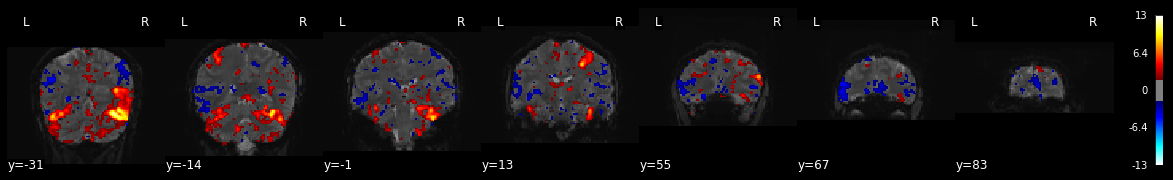

In [50]:
derivatives = '/mnt/d/Documents/EMUR01_test/derivatives'
plot_stat_map(
    stat_map_img=(
        f'{derivatives}/funcworks/model-initial/'
        'sub-4001/ses-S2/sub-4001_ses-S2_task-test_contrast-trialTypenegFoilCr_stat-z_statmap.nii.gz'),
    bg_img=f'{derivatives}/fmriprep/sub-4001/ses-S2/func/sub-4001_ses-S2_task-test_run-2_boldref.nii.gz',
    threshold=2, display_mode='y');